# OWID Exploratory Data Analysis

CO2 and Greenhouse Gas Emissions Data by Our World in Data: https://github.com/owid/co2-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import altair as alt
import math
from functools import reduce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('dataset/owid/owid-co2-data.csv')
codebook = pd.read_csv('dataset/owid/owid-co2-codebook.csv')

# function to get the description of a column
def get_column_desc(column_name):
    col =  codebook[codebook['column']==column_name]
    if len(col) == 0:
        return 'the specified column does not exists'
    return str(col.iloc[0]['description'])

In [3]:
df

iso_code      country  year     co2  consumption_co2  co2_growth_prct  \
0          AFG  Afghanistan  1949   0.015              NaN              NaN   
1          AFG  Afghanistan  1950   0.084              NaN           475.00   
2          AFG  Afghanistan  1951   0.092              NaN             8.70   
3          AFG  Afghanistan  1952   0.092              NaN             0.00   
4          AFG  Afghanistan  1953   0.106              NaN            16.00   
...        ...          ...   ...     ...              ...              ...   
25199      ZWE     Zimbabwe  2016  10.738           12.153           -12.17   
25200      ZWE     Zimbabwe  2017   9.582           11.248           -10.77   
25201      ZWE     Zimbabwe  2018  11.854           13.163            23.72   
25202      ZWE     Zimbabwe  2019  10.949           12.422            -7.64   
25203      ZWE     Zimbabwe  2020  10.531              NaN            -3.82   

       co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
0                 NaN        NaN           0.002                         NaN   
1               0.070        NaN           0.011                         NaN   
2               0.007        NaN           0.012                         NaN   
3               0.000        NaN           0.012                         NaN   
4               0.015        NaN           0.013                         NaN   
...               ...        ...             ...                         ...   
25199          -1.488      1.415           0.765                       0.866   
25200          -1.156      1.666           0.673                       0.790   
25201           2.273      1.308           0.821                       0.912   
25202          -0.905      1.473           0.748                       0.848   
25203          -0.418        NaN           0.709                         NaN   

       ...  ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
0      ...             NaN      NaN                 NaN            NaN   
1      ...             NaN      NaN                 NaN            NaN   
2      ...             NaN      NaN                 NaN            NaN   
3      ...             NaN      NaN                 NaN            NaN   
4      ...             NaN      NaN                 NaN            NaN   
...    ...             ...      ...                 ...            ...   
25199  ...           4.703    11.92                0.85           6.55   
25200  ...             NaN      NaN                 NaN            NaN   
25201  ...             NaN      NaN                 NaN            NaN   
25202  ...             NaN      NaN                 NaN            NaN   
25203  ...             NaN      NaN                 NaN            NaN   

       nitrous_oxide_per_capita  population           gdp  \
0                           NaN   7624058.0           NaN   
1                           NaN   7752117.0  9.421400e+09   
2                           NaN   7840151.0  9.692280e+09   
3                           NaN   7935996.0  1.001732e+10   
4                           NaN   8039684.0  1.063052e+10   
...                         ...         ...           ...   
25199                     0.467  14030338.0  2.096179e+10   
25200                       NaN  14236599.0  2.194784e+10   
25201                       NaN  14438812.0  2.271535e+10   
25202                       NaN  14645473.0           NaN   
25203                       NaN  14862927.0           NaN   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
0                             NaN                NaN             NaN  
1                             NaN                NaN             NaN  
2                             NaN                NaN             NaN  
3                             NaN                NaN             NaN  
4                             NaN                NaN             NaN  
...                           ...               

The codebook provides description and the source for each variable in the dataset.

In [4]:
codebook.head()

column                                        description  \
0        iso_code    ISO 3166-1 alpha-3 – three-letter country codes   
1         country                                Geographic location   
2            year                                Year of observation   
3             co2  Annual production-based emissions of carbon di...   
4  co2_per_capita  Annual production-based emissions of carbon di...   

                                              source  
0     International Organization for Standardization  
1                                  Our World in Data  
2                                  Our World in Data  
3                              Global Carbon Project  
4  Our World in Data based on the Global Carbon P...

In [5]:
get_column_desc('co2')

'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.'

## Dataset Overview

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25204 entries, 0 to 25203
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             21948 non-null  object 
 1   country                              25204 non-null  object 
 2   year                                 25204 non-null  int64  
 3   co2                                  23949 non-null  float64
 4   consumption_co2                      3976 non-null   float64
 5   co2_growth_prct                      24931 non-null  float64
 6   co2_growth_abs                       23585 non-null  float64
 7   trade_co2                            3976 non-null   float64
 8   co2_per_capita                       23307 non-null  float64
 9   consumption_co2_per_capita           3976 non-null   float64
 10  share_global_co2                     23949 non-null  float64
 11  cumulative_co2              

In [7]:
df.describe()

year           co2  consumption_co2  co2_growth_prct  \
count  25204.000000  23949.000000      3976.000000     24931.000000   
mean    1953.225797    267.861942       916.755170        21.098600   
std       53.791369   1521.680894      3373.348275       702.565991   
min     1750.000000      0.000000         0.197000       -99.640000   
25%     1925.000000      0.528000        10.319750        -0.450000   
50%     1967.000000      4.857000        57.091000         3.350000   
75%     1995.000000     42.818000       276.378750        10.460000   
max     2020.000000  36702.503000     36702.503000    102318.510000   

       co2_growth_abs    trade_co2  co2_per_capita  \
count    23585.000000  3976.000000    23307.000000   
mean         5.146889    -2.415624        4.170811   
std         55.259760   182.444942       14.912201   
min      -1895.244000 -1657.998000        0.000000   
25%         -0.011000    -0.892500        0.253000   
50%          0.059000     1.953000        1.250000   
75%          1.103000     9.700500        4.657500   
max       1736.258000  1028.487000      748.639000   

       consumption_co2_per_capita  share_global_co2  cumulative_co2  ...  \
count                 3976.000000      23949.000000    2.394900e+04  ...   
mean                     6.567721          4.983979    1.035710e+04  ...   
std                      6.927957         17.704994    6.120603e+04  ...   
min                      0.055000          0.000000    0.000000e+00  ...   
25%                      1.240250          0.010000    6.992000e+00  ...   
50%                      4.359500          0.060000    9.131800e+01  ...   
75%                      9.848500          0.600000    1.147514e+03  ...   
max                     57.792000        100.000000    1.696524e+06  ...   

       ghg_per_capita      methane  methane_per_capita  nitrous_oxide  \
count     5155.000000  5211.000000         5157.000000    5211.000000   
mean         8.099506    82.253370            2.046923      29.308135   
std          9.387477   566.702756            3.534126     199.291118   
min        -50.487000     0.000000            0.000000       0.000000   
25%          2.514000     2.150000            0.715000       0.535000   
50%          5.474000     9.030000            1.111000       3.590000   
75%         10.299000    31.055000            1.690000      10.570000   
max         86.991000  8660.010000           39.812000    3054.000000   

       nitrous_oxide_per_capita    population           gdp  \
count               5157.000000  2.287800e+04  1.353800e+04   
mean                   0.606690  7.072322e+07  2.877088e+11   
std                    0.844671  3.795858e+08  2.180094e+12   
min                    0.000000  1.490000e+03  5.543200e+07   
25%                    0.228000  1.291899e+06  9.828867e+09   
50%                    0.384000  4.880320e+06  3.037019e+10   
75%                    0.607000  1.759622e+07  1.268944e+11   
max                    8.239000  7.794799e+09  1.136302e+14   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
count                 8690.000000        8681.000000     6803.000000  
mean                  1569.083895       25568.487454        1.850291  
std                   9066.102799       33319.956208        1.575161  
min                      0.000000           0.000000        0.050000  
25%                      6.997000        3270.369000        0.856000  
50%                     61.404500       13701.318000        1.407000  
75%                    352.884500       35493.775000        2.351000  
max                 162194.290000      317582.498000       13.493000  

[8 rows x 56 columns]

In [8]:
# change 'year' to string object
df = df.astype({'year': str})
print(df['year'].dtypes)

object


## Missing value identification

In [9]:
# function to count missing value
def get_nan(df, sort=False):
    missing_value = df[df.isna().values.any(axis=1)]
    rows = missing_value.shape[0]
    print(rows, "rows with missing values")
    
    if rows < 0:
        return 0
    if sort:
        print(df.isna().sum().sort_values())
    else:
        print(df.isna().sum())
        

In [10]:
get_nan(df, sort=True)

24156 rows with missing values
country                                    0
year                                       0
co2_growth_prct                          273
cumulative_co2                          1255
co2                                     1255
share_global_cumulative_co2             1255
share_global_co2                        1255
co2_growth_abs                          1619
co2_per_capita                          1897
population                              2326
iso_code                                3256
share_global_oil_co2                    4665
share_global_cumulative_oil_co2         4665
cumulative_oil_co2                      4665
oil_co2                                 4665
oil_co2_per_capita                      5023
share_global_coal_co2                   8016
coal_co2                                8016
cumulative_coal_co2                     8016
share_global_cumulative_coal_co2        8016
coal_co2_per_capita                     8344
co2_per_gdp             

In [11]:
# function to visualize the proportion of missing value
def visual_nan(df, name="", isSorted=False, savePlot=True):
    
    sort = ''
    if isSorted:
        df=df[df.isna().sum().sort_values().keys()]
        sort = '_sorted'
    missing_value = df.isna().melt(value_name="missing")

    ax = sns.displot(data=missing_value,
                      y="variable",
                      hue="missing",
                      multiple="fill",
                      height=10,
                      aspect=1.5)
    plt.xlabel("Proportion of missing value")
    plt.title(f"Missing values of {name}")
    
    if savePlot:
        filename = name.split('.')
        plt.savefig(f"plot/{filename[0]}{sort}.png")

    return ax

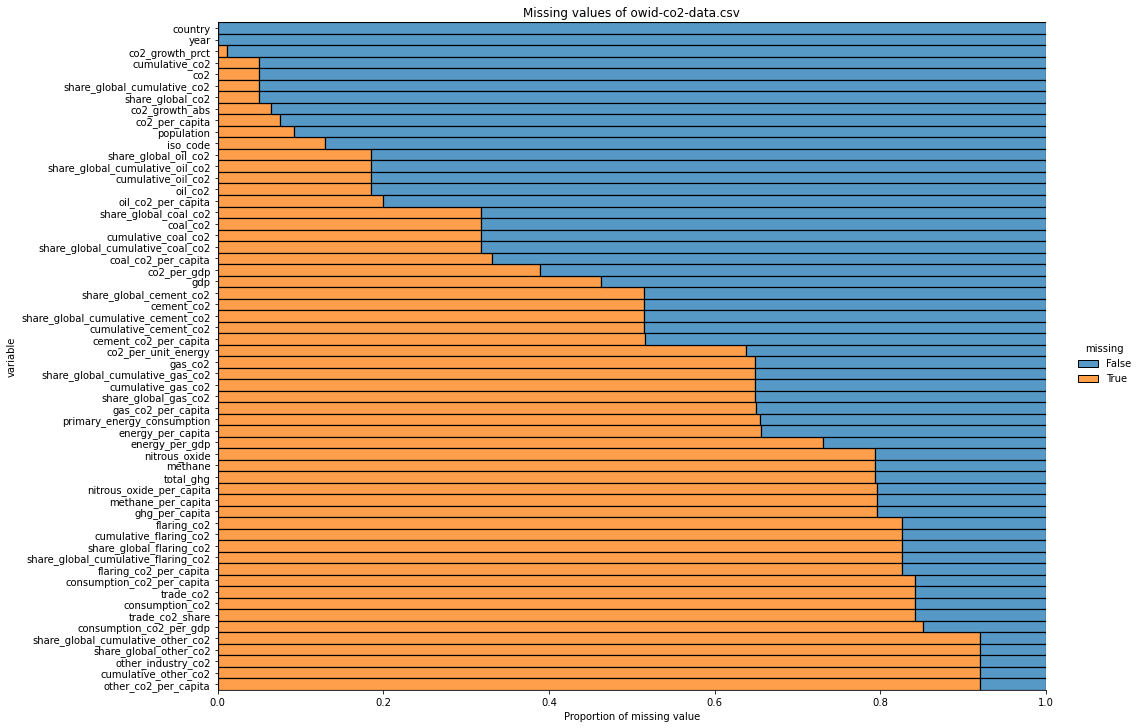

In [12]:
visual_nan(df, 'owid-co2-data.csv', isSorted=True)

In [13]:
missing = pd.DataFrame(df.isna().sum(), columns=['missing'])
missing.reset_index(inplace=True)
missing.rename(columns={'index':'col'}, inplace=True)
missing['ratio'] = (missing['missing']/len(df)*100).round(2)
missing_list = missing[missing['ratio'] > 70]['col'].tolist()
missing_list

['consumption_co2',
 'trade_co2',
 'consumption_co2_per_capita',
 'consumption_co2_per_gdp',
 'flaring_co2',
 'other_industry_co2',
 'flaring_co2_per_capita',
 'other_co2_per_capita',
 'trade_co2_share',
 'share_global_flaring_co2',
 'share_global_other_co2',
 'cumulative_flaring_co2',
 'cumulative_other_co2',
 'share_global_cumulative_flaring_co2',
 'share_global_cumulative_other_co2',
 'total_ghg',
 'ghg_per_capita',
 'methane',
 'methane_per_capita',
 'nitrous_oxide',
 'nitrous_oxide_per_capita',
 'energy_per_gdp']

In [14]:
# function to display the number of missing values and missing ratio
def missing_ratio_summary(df):
    missing = pd.DataFrame(df.isna().sum(), columns=['missing'])
    missing.reset_index(inplace=True)
    missing.rename(columns={'index':'col'}, inplace=True)
    missing['ratio'] = (missing['missing']/len(df)*100).round(2)

    display(missing.sort_values(by=['ratio']))
    
# function to return a list of columns with more than x% of missing values 
def get_X_missing(df, X):
    missing = pd.DataFrame(df.isna().sum(), columns=['missing'])
    missing.reset_index(inplace=True)
    missing.rename(columns={'index':'col'}, inplace=True)
    missing['ratio'] = (missing['missing']/len(df)*100).round(2)
    
    missing_list = missing[missing['ratio'] > X]['col'].tolist()
    return missing_list
    
missing_ratio_summary(df)

col  missing  ratio
1                               country        0   0.00
2                                  year        0   0.00
5                       co2_growth_prct      273   1.08
11                       cumulative_co2     1255   4.98
3                                   co2     1255   4.98
12          share_global_cumulative_co2     1255   4.98
10                     share_global_co2     1255   4.98
6                        co2_growth_abs     1619   6.42
8                        co2_per_capita     1897   7.53
53                           population     2326   9.23
0                              iso_code     3256  12.92
33                 share_global_oil_co2     4665  18.51
45      share_global_cumulative_oil_co2     4665  18.51
39                   cumulative_oil_co2     4665  18.51
20                              oil_co2     4665  18.51
26                   oil_co2_per_capita     5023  19.93
30                share_global_coal_co2     8016  31.80
16                             coal_co2     8016  31.80
36                  cumulative_coal_co2     8016  31.80
42     share_global_cumulative_coal_co2     8016  31.80
23                  coal_co2_per_capita     8344  33.11
13                          co2_per_gdp     9815  38.94
54                                  gdp    11666  46.29
29              share_global_cement_co2    12956  51.40
17                           cement_co2    12956  51.40
41   share_global_cumulative_cement_co2    12956  51.40
35                cumulative_cement_co2    12956  51.40
22                cement_co2_per_capita    12986  51.52
15                  co2_per_unit_energy    16063  63.73
19                              gas_co2    16359  64.91
44      share_global_cumulative_gas_co2    16359  64.91
38                   cumulative_gas_co2    16359  64.91
32                 share_global_gas_co2    16359  64.91
25                   gas_co2_per_capita    16369  64.95
55           primary_energy_consumption    16514  65.52
56                    energy_per_capita    16523  65.56
57                       energy_per_gdp    18401  73.01
51                        nitrous_oxide    19993  79.32
49                              methane    19993  79.32
47                            total_ghg    19996  79.34
52             nitrous_oxide_per_capita    20047  79.54
50                   methane_per_capita    20047  79.54
48                       ghg_per_capita    20049  79.55
18                          flaring_co2    20822  82.61
37               cumulative_flaring_co2    20822  82.61
31             share_global_flaring_co2    20822  82.61
43  share_global_cumulative_flaring_co2    20822  82.61
24               flaring_co2_per_capita    20823  82.62
9            consumption_co2_per_capita    21228  84.22
7                             trade_co2    21228  84.22
4                       consumption_co2    21228  84.22
28                      trade_co2_share    21228  84.22
14              consumption_co2_per_gdp    21443  85.08
46    share_global_cumulative_other_co2    23205  92.07
34               share_global_other_co2    23205  92.07
21                   other_industry_co2    23205  92.07
40                 cumulative_other_co2    23205  92.07
27                 other_co2_per_capita    23205  92.07

... something need to be done ...

## Outlier detection

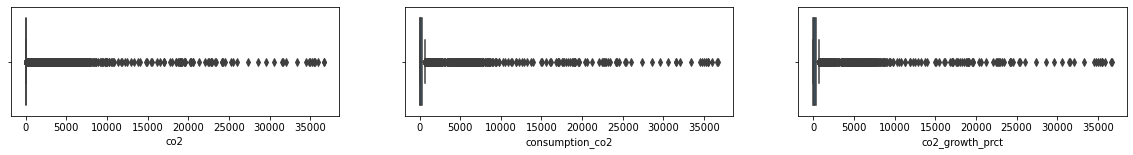

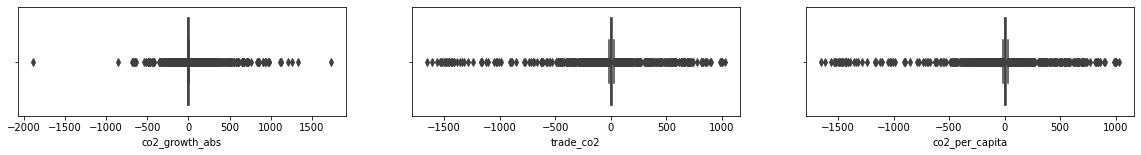

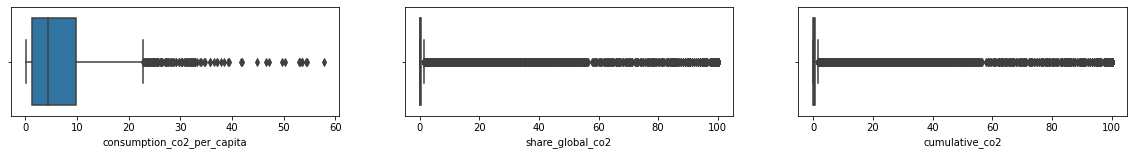

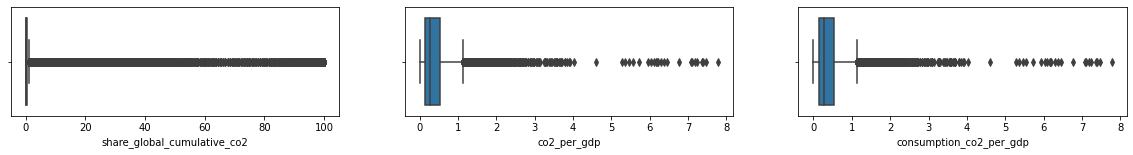

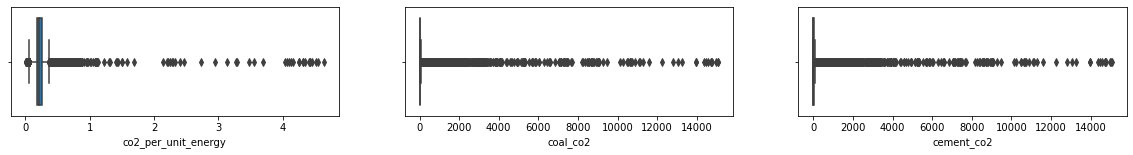

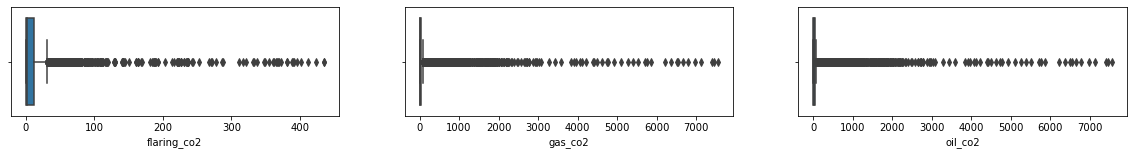

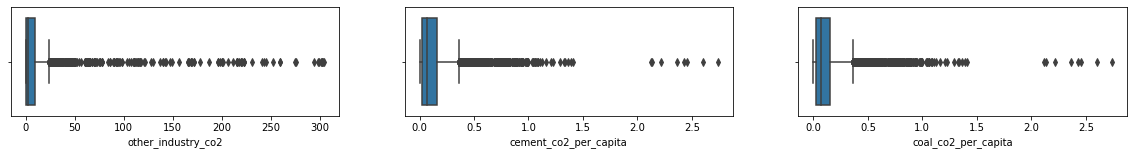

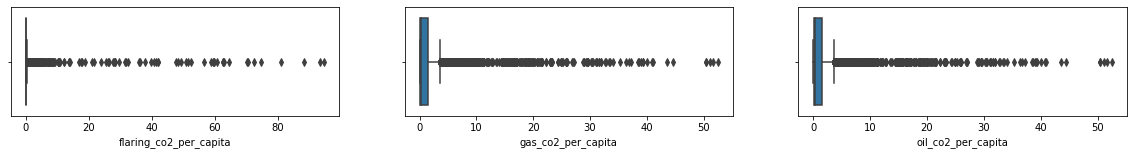

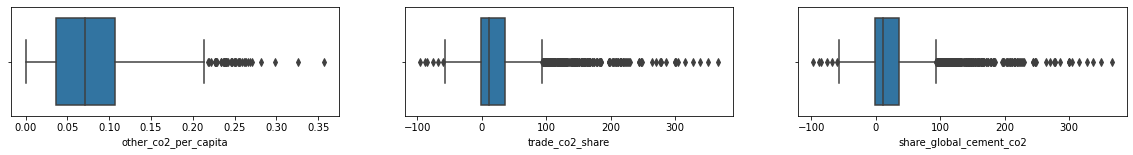

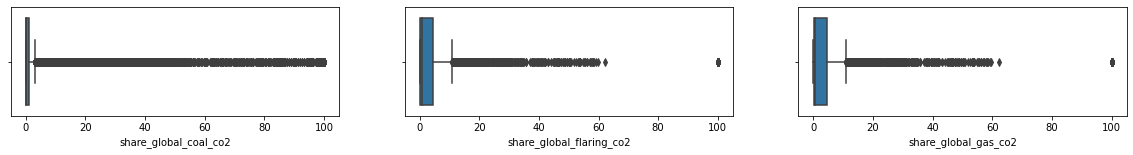

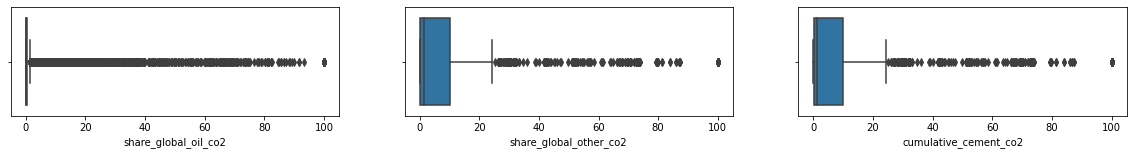

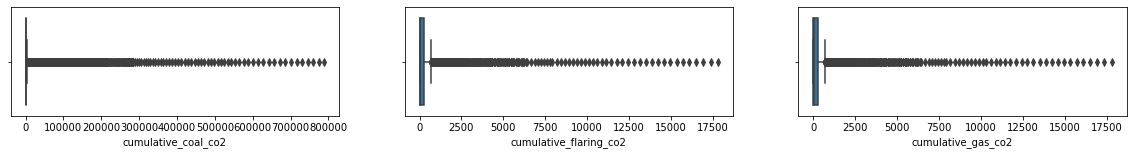

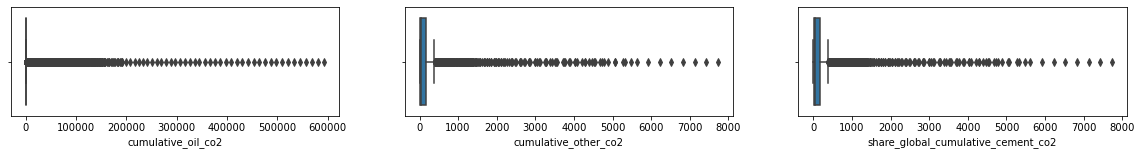

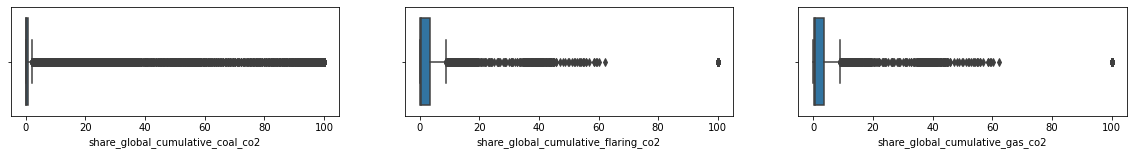

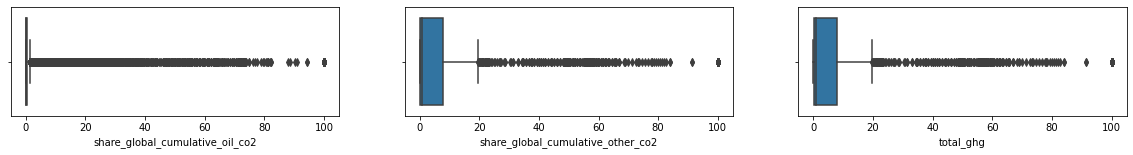

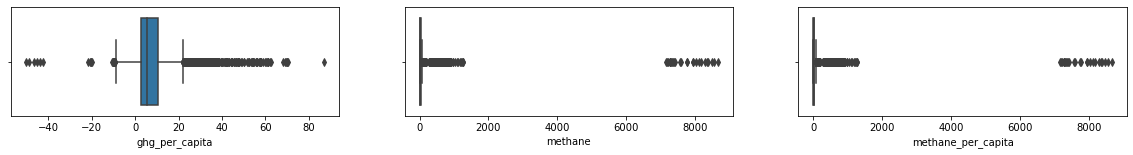

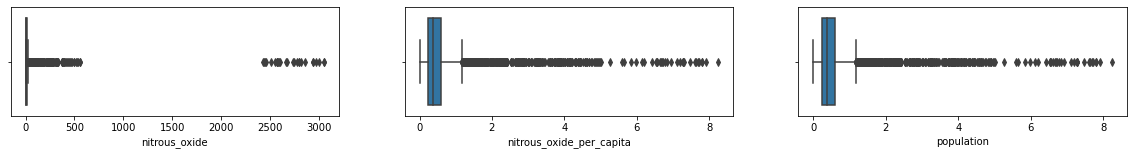

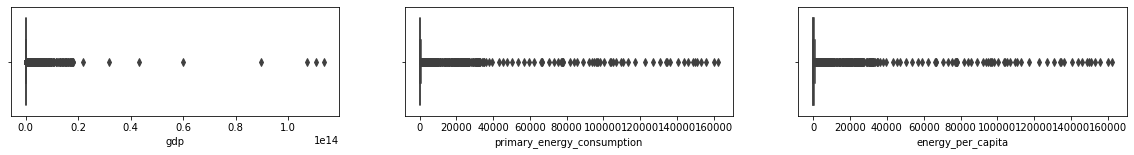

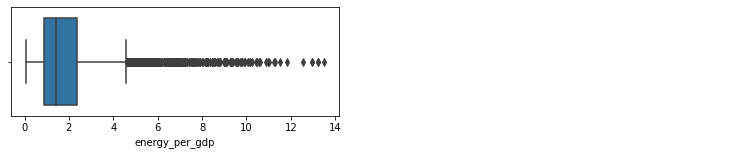

In [15]:
# function to plot boxplot
def plot_boxplot(series, title='', xlabel=''):
    bp = sns.boxplot(x=series)
    bp.set(title=title,
           xlabel=xlabel)
    return bp

# function to plot boxplot for all numeric columns
def check_outlier(df):
    numeric_columns = df.describe().columns.copy()
    num_of_columns = len(numeric_columns)
    
    for i in range(math.ceil(num_of_columns/3)):
        c = 3*i
        
        plt.figure(figsize=(20,2))
        
        plt.subplot(1, 3, 1)
        plot_boxplot(df[numeric_columns[c]], xlabel=numeric_columns[c])
        
        plt.subplot(1, 3, 2)
        try:
            plot_boxplot(df[numeric_columns[c+1]], xlabel=numeric_columns[c+1])
        except IndexError:
            plt.xticks([]), plt.yticks([])
            plt.axis("off")
            break
        
        plt.subplot(1, 3, 3)
        try:
            plot_boxplot(df[numeric_columns[c+1]], xlabel=numeric_columns[c+2])
        except IndexError:
            plt.xticks([]), plt.yticks([])
            plt.axis("off")
            break
        plt.show()

        
check_outlier(df)

In [16]:
# function to plot an interactive boxplot 
def check_outlier_px(df, col_name):    
    try:
        fig = px.box(df, y=col_name)
        fig.show()
    except Exception as ex:
        print('Something went wrong')

In [17]:
check_outlier_px(df, 'year')

## Categorical data

In [18]:
unique_iso_codes = df.iso_code.unique()
unique_countries = df.country.unique()
unique_years = df.year.unique()

In [19]:
print(unique_iso_codes)
print(len(unique_iso_codes))

['AFG' nan 'ALB' 'DZA' 'AND' 'AGO' 'AIA' 'ATA' 'ATG' 'ARG' 'ARM' 'ABW'
 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU'
 'BTN' 'BOL' 'BES' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM'
 'CMR' 'CAN' 'CPV' 'CAF' 'TCD' 'CHL' 'CHN' 'CXR' 'COL' 'COM' 'COG' 'COK'
 'CRI' 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM'
 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA'
 'GUF' 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GRL' 'GRD' 'GLP' 'GTM'
 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ'
 'IRL' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'OWID_KOS' 'KWT'
 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MDG' 'MWI'
 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MTQ' 'MRT' 'MUS' 'MYT' 'MEX' 'MDA' 'MNG'
 'MNE' 'MSR' 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC'
 'NER' 'NGA' 'NIU' 'PRK' 'MKD' 'NOR' 'OMN' 'PAK' 'PLW' 'PSE' 'PAN' 'PNG'
 'PRY' 'PER' 'PHL' 'POL' 'PRT' 'PRI' 'QAT' 'ROU' 'RUS'

In [20]:
print(unique_countries)
print(len(unique_countries))

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia'
 'Asia (excl. China & India)' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'EU-27' 'EU-28' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'Faeroe Islands' 'Fiji'
 'Finland' 'F

In [21]:
unique_years.sort()
print(unique_years)
print(len(unique_years))

['1750' '1751' '1752' '1753' '1754' '1755' '1756' '1757' '1758' '1759'
 '1760' '1761' '1762' '1763' '1764' '1765' '1766' '1767' '1768' '1769'
 '1770' '1771' '1772' '1773' '1774' '1775' '1776' '1777' '1778' '1779'
 '1780' '1781' '1782' '1783' '1784' '1785' '1786' '1787' '1788' '1789'
 '1790' '1791' '1792' '1793' '1794' '1795' '1796' '1797' '1798' '1799'
 '1800' '1801' '1802' '1803' '1804' '1805' '1806' '1807' '1808' '1809'
 '1810' '1811' '1812' '1813' '1814' '1815' '1816' '1817' '1818' '1819'
 '1820' '1821' '1822' '1823' '1824' '1825' '1826' '1827' '1828' '1829'
 '1830' '1831' '1832' '1833' '1834' '1835' '1836' '1837' '1838' '1839'
 '1840' '1841' '1842' '1843' '1844' '1845' '1846' '1847' '1848' '1849'
 '1850' '1851' '1852' '1853' '1854' '1855' '1856' '1857' '1858' '1859'
 '1860' '1861' '1862' '1863' '1864' '1865' '1866' '1867' '1868' '1869'
 '1870' '1871' '1872' '1873' '1874' '1875' '1876' '1877' '1878' '1879'
 '1880' '1881' '1882' '1883' '1884' '1885' '1886' '1887' '1888' '1889'
 '1890

In [22]:
# plt.figure(figsize=(30, 3))
# sns.countplot(x="iso_code", data=df, palette='rocket')

In [23]:
px.histogram(df, x="iso_code")

In [24]:
px.histogram(df, x="country")

In [25]:
px.histogram(df.sort_values(by=['year']), x="year")

## Top countries that produce the most Carbon Dioxide (CO2)

China, US, India

In [26]:
# function to slice out country from the master df
def get_country_data(df, country_name):
    df_country = df[df['country'] == f'{country_name}']
    df_country.reset_index(inplace=True, drop=True)
    return df_country

#### China

In [27]:
df_china_raw = get_country_data(df, 'China')
print(df_china_raw.shape)

(122, 58)


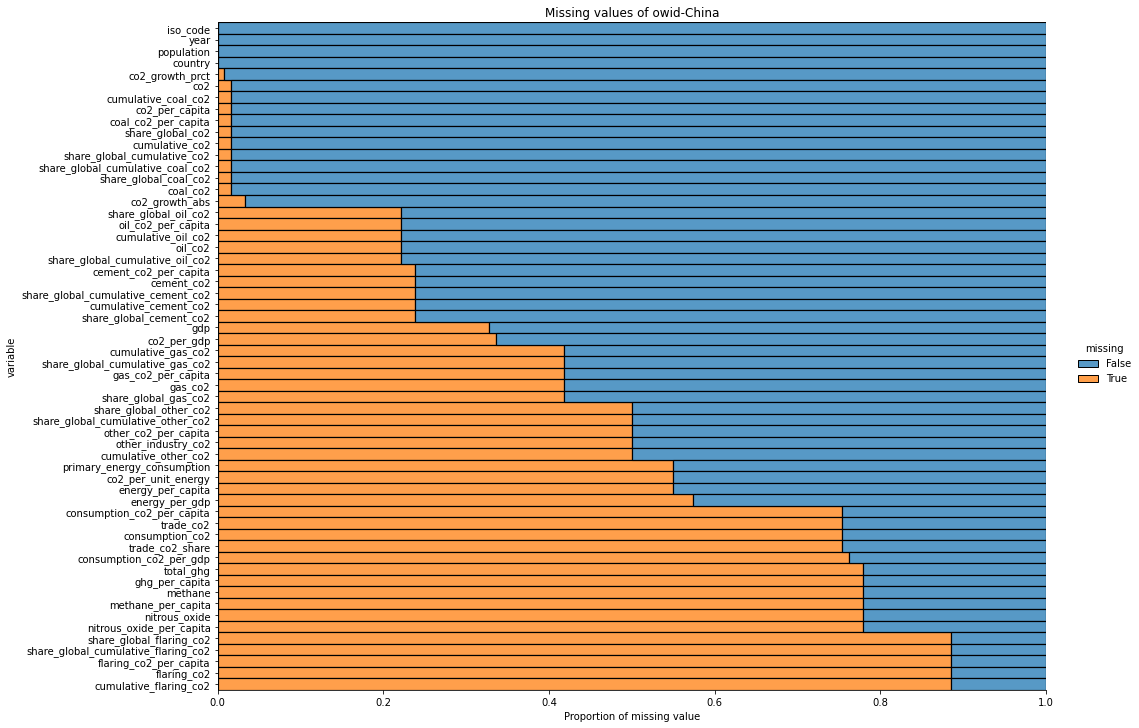

In [28]:
visual_nan(df_china_raw, name='owid-China', isSorted=True)

In [29]:
missing_ratio_summary(df_china_raw)

col  missing  ratio
0                              iso_code        0   0.00
2                                  year        0   0.00
53                           population        0   0.00
1                               country        0   0.00
5                       co2_growth_prct        1   0.82
3                                   co2        2   1.64
36                  cumulative_coal_co2        2   1.64
8                        co2_per_capita        2   1.64
23                  coal_co2_per_capita        2   1.64
10                     share_global_co2        2   1.64
11                       cumulative_co2        2   1.64
12          share_global_cumulative_co2        2   1.64
42     share_global_cumulative_coal_co2        2   1.64
30                share_global_coal_co2        2   1.64
16                             coal_co2        2   1.64
6                        co2_growth_abs        4   3.28
33                 share_global_oil_co2       27  22.13
26                   oil_co2_per_capita       27  22.13
39                   cumulative_oil_co2       27  22.13
20                              oil_co2       27  22.13
45      share_global_cumulative_oil_co2       27  22.13
22                cement_co2_per_capita       29  23.77
17                           cement_co2       29  23.77
41   share_global_cumulative_cement_co2       29  23.77
35                cumulative_cement_co2       29  23.77
29              share_global_cement_co2       29  23.77
54                                  gdp       40  32.79
13                          co2_per_gdp       41  33.61
38                   cumulative_gas_co2       51  41.80
44      share_global_cumulative_gas_co2       51  41.80
25                   gas_co2_per_capita       51  41.80
19                              gas_co2       51  41.80
32                 share_global_gas_co2       51  41.80
34               share_global_other_co2       61  50.00
46    share_global_cumulative_other_co2       61  50.00
27                 other_co2_per_capita       61  50.00
21                   other_industry_co2       61  50.00
40                 cumulative_other_co2       61  50.00
55           primary_energy_consumption       67  54.92
15                  co2_per_unit_energy       67  54.92
56                    energy_per_capita       67  54.92
57                       energy_per_gdp       70  57.38
9            consumption_co2_per_capita       92  75.41
7                             trade_co2       92  75.41
4                       consumption_co2       92  75.41
28                      trade_co2_share       92  75.41
14              consumption_co2_per_gdp       93  76.23
47                            total_ghg       95  77.87
48                       ghg_per_capita       95  77.87
49                              methane       95  77.87
50                   methane_per_capita       95  77.87
51                        nitrous_oxide       95  77.87
52             nitrous_oxide_per_capita       95  77.87
31             share_global_flaring_co2      108  88.52
43  share_global_cumulative_flaring_co2      108  88.52
24               flaring_co2_per_capita      108  88.52
18                          flaring_co2      108  88.52
37               cumulative_flaring_co2      108  88.52

### Handling Missing Values

| Percentage of Missing values | Action                                           |
| :--------------------------- | :----------------------------------------------- |
| [ 0%,  70%]                  | Multivariate imputation                          |
| (70%, 100%]                  | Drop column                                      |
  
Columns with *more than* 70% of missing values are dropped. 

Use `get_X_missing(df, X)` function to get a list of columns that applies.

In [30]:
col_to_drop_china = get_X_missing(df_china_raw, 70) # columns that have more than 70% missing values
print(len(col_to_drop_china))
print(col_to_drop_china)

16
['consumption_co2', 'trade_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'trade_co2_share', 'share_global_flaring_co2', 'cumulative_flaring_co2', 'share_global_cumulative_flaring_co2', 'total_ghg', 'ghg_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita']


In [31]:
df_china = df_china_raw.drop(col_to_drop_china, axis=1)
df_china

iso_code country  year        co2  co2_growth_prct  co2_growth_abs  \
0        CHN   China  1899      0.095              NaN             NaN   
1        CHN   China  1900        NaN             0.00             NaN   
2        CHN   China  1901        NaN             0.00             NaN   
3        CHN   China  1902      0.095             0.00             NaN   
4        CHN   China  1903      1.964          1961.54           1.869   
..       ...     ...   ...        ...              ...             ...   
117      CHN   China  2016   9720.444            -1.30        -127.976   
118      CHN   China  2017   9920.459             2.06         200.015   
119      CHN   China  2018  10289.990             3.72         369.530   
120      CHN   China  2019  10489.989             1.94         199.999   
121      CHN   China  2020  10667.887             1.70         177.899   

     co2_per_capita  share_global_co2  cumulative_co2  \
0             0.000              0.01           0.095   
1               NaN               NaN             NaN   
2               NaN               NaN             NaN   
3             0.000              0.00           0.191   
4             0.005              0.09           2.154   
..              ...               ...             ...   
117           6.874             27.42      194195.688   
118           6.981             27.61      204116.147   
119           7.208             28.08      214406.137   
120           7.316             28.58      224896.125   
121           7.412             30.65      235564.013   

     share_global_cumulative_co2  ...  share_global_cumulative_cement_co2  \
0                           0.00  ...                                 NaN   
1                            NaN  ...                                 NaN   
2                            NaN  ...                                 NaN   
3                           0.00  ...                                 NaN   
4                           0.00  ...                                 NaN   
..                           ...  ...                                 ...   
117                        12.51  ...                               31.40   
118                        12.85  ...                               32.15   
119                        13.19  ...                               32.86   
120                        13.53  ...                               33.58   
121                        13.89  ...                               34.30   

     share_global_cumulative_coal_co2  share_global_cumulative_gas_co2  \
0                                0.00                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                0.00                              NaN   
4                                0.00                              NaN   
..                                ...                              ...   
117                             20.25                             1.84   
118                             20.81                             1.99   
119                             21.37                             2.15   
120                             21.92                             2.32   
121                             22.48                             2.49   

     share_global_cumulative_oil_co2  share_global_cumulative_other_co2  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   
..                               ...                                ...   
117                             4.89                              49.55   
118             

Doing the same to **United States** and **India**.

#### United States

(221, 58)


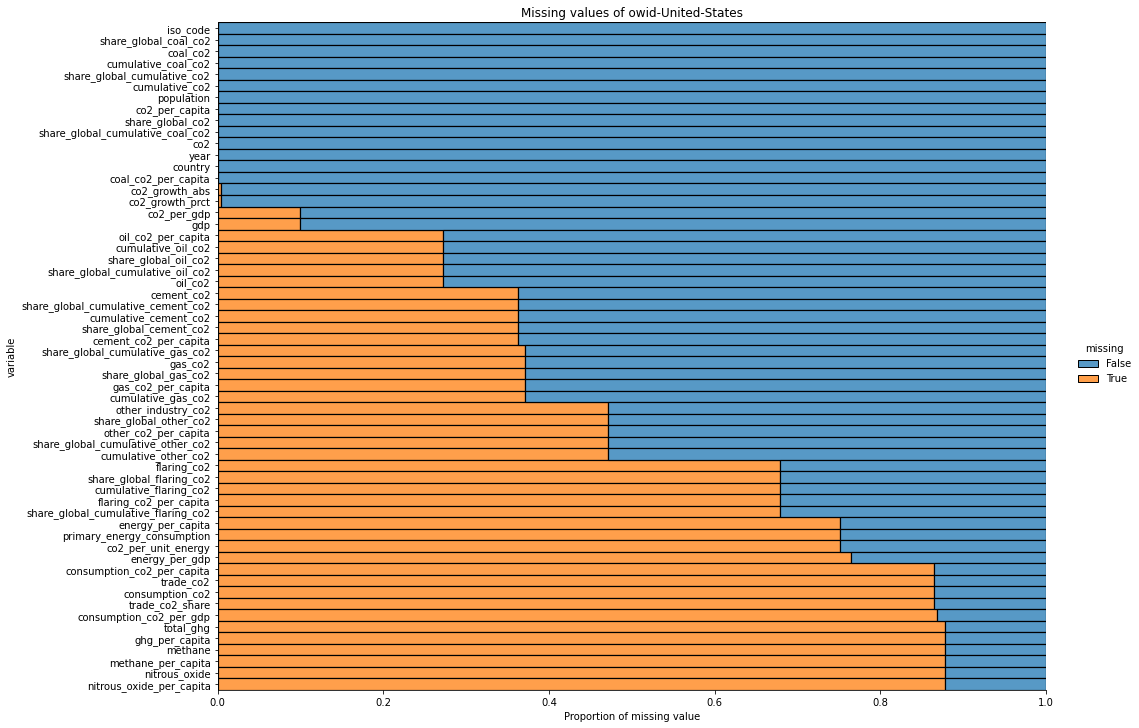

In [32]:
df_us_raw = get_country_data(df, 'United States')
print(df_us_raw.shape)
visual_nan(df_us_raw, name='owid-United-States', isSorted=True)

In [33]:
col_to_drop_us = get_X_missing(df_us_raw, 70) # columns that have more than 70% missing values
print(len(col_to_drop_us))
print(f"A list of columns to drop: \n{col_to_drop_us}")

df_us = df_us_raw.drop(col_to_drop_us, axis=1)
df_us

15
A list of columns to drop: 
['consumption_co2', 'trade_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'co2_per_unit_energy', 'trade_co2_share', 'total_ghg', 'ghg_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'primary_energy_consumption', 'energy_per_capita', 'energy_per_gdp']


iso_code        country  year       co2  co2_growth_prct  co2_growth_abs  \
0        USA  United States  1800     0.253              NaN             NaN   
1        USA  United States  1801     0.267             5.80           0.015   
2        USA  United States  1802     0.289             8.22           0.022   
3        USA  United States  1803     0.297             2.53           0.007   
4        USA  United States  1804     0.333            12.35           0.037   
..       ...            ...   ...       ...              ...             ...   
216      USA  United States  2016  5248.024            -2.30        -123.747   
217      USA  United States  2017  5207.751            -0.77         -40.273   
218      USA  United States  2018  5375.491             3.22         167.739   
219      USA  United States  2019  5255.816            -2.23        -119.674   
220      USA  United States  2020  4712.771           -10.33        -543.046   

     co2_per_capita  share_global_co2  cumulative_co2  \
0             0.042              0.90           0.253   
1             0.044              0.96           0.520   
2             0.046              0.79           0.810   
3             0.047              0.94           1.107   
4             0.052              0.97           1.440   
..              ...               ...             ...   
216          16.247             14.80      396171.260   
217          16.020             14.50      401379.012   
218          16.434             14.67      406754.502   
219          15.972             14.32      412010.318   
220          14.238             13.54      416723.089   

     share_global_cumulative_co2  ...  cumulative_oil_co2  \
0                           0.03  ...                 NaN   
1                           0.06  ...                 NaN   
2                           0.10  ...                 NaN   
3                           0.13  ...                 NaN   
4                           0.16  ...                 NaN   
..                           ...  ...                 ...   
216                        25.52  ...          149222.148   
217                        25.27  ...          151487.474   
218                        25.03  ...          153804.284   
219                        24.79  ...          156117.656   
220                        24.56  ...          158138.194   

     cumulative_other_co2  share_global_cumulative_cement_co2  \
0                     NaN                                 NaN   
1                     NaN                                 NaN   
2                     NaN                                 NaN   
3                     NaN                                 NaN   
4                     NaN                                 NaN   
..                    ...                                 ...   
216              1282.985                                7.01   
217              1310.175                                6.84   
218              1334.303                                6.67   
219              1357.594                                6.51   
220              1380.885                                6.36   

     share_global_cumulative_coal_co2  share_global_cumulative_flaring_co2  \
0                                0.03                                  NaN   
1                                0.06                                  NaN   
2                                0.10                                  NaN   
3                                0.13                                  NaN   
4                                0.16                                  NaN   
..                                ...                                  ...   
216                             23.41                                12.17   
217                             23.14                                12.20   
218                             22.86                                12.32   
219                             22.57                           

#### India

(163, 58)


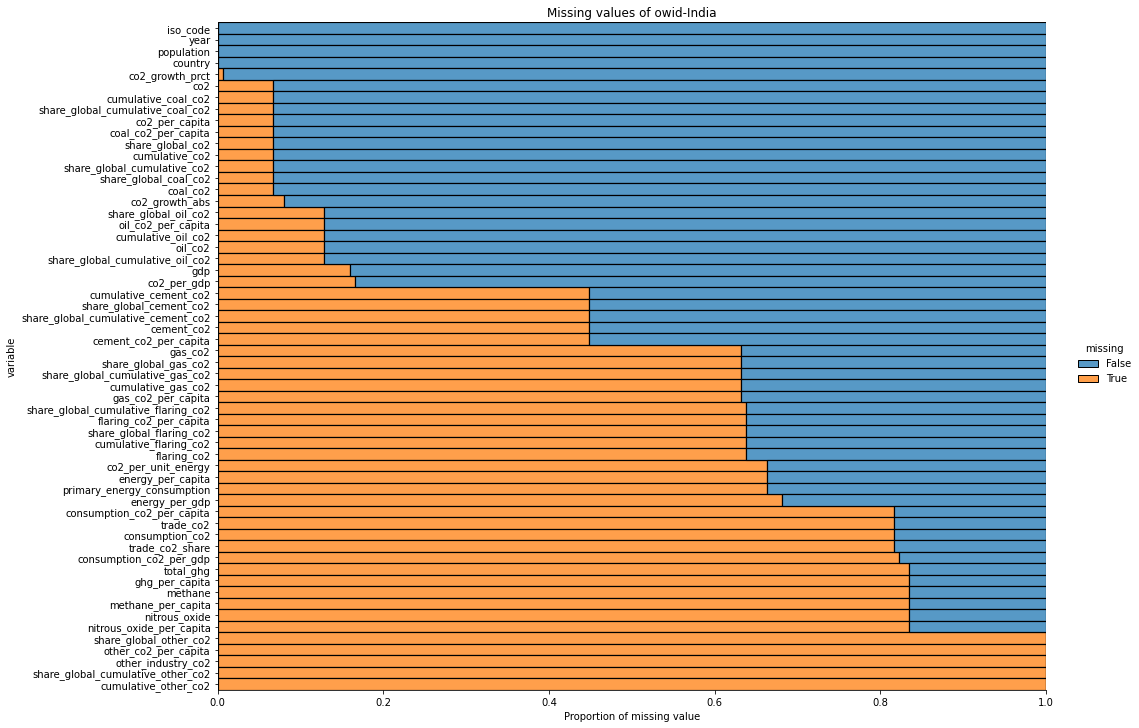

In [34]:
df_india_raw = get_country_data(df, 'India')
print(df_india_raw.shape)
visual_nan(df_india_raw, name='owid-India', isSorted=True)

In [35]:
col_to_drop_india = get_X_missing(df_india_raw, 70) # columns that have more than 70% missing values
print(len(col_to_drop_india))
print(f"A list of columns to drop: \n{col_to_drop_india}")

df_india = df_india_raw.drop(col_to_drop_india, axis=1)
df_india

16
A list of columns to drop: 
['consumption_co2', 'trade_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'other_industry_co2', 'other_co2_per_capita', 'trade_co2_share', 'share_global_other_co2', 'cumulative_other_co2', 'share_global_cumulative_other_co2', 'total_ghg', 'ghg_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita']


iso_code country  year       co2  co2_growth_prct  co2_growth_abs  \
0        IND   India  1858     0.395              NaN             NaN   
1        IND   India  1859     0.637            61.34           0.242   
2        IND   India  1860     0.644             1.04           0.007   
3        IND   India  1861     0.498           -22.68          -0.146   
4        IND   India  1862     0.551            10.67           0.053   
..       ...     ...   ...       ...              ...             ...   
158      IND   India  2016  2382.223             5.01         113.656   
159      IND   India  2017  2433.856             2.17          51.633   
160      IND   India  2018  2599.806             6.82         165.950   
161      IND   India  2019  2625.968             1.01          26.162   
162      IND   India  2020  2441.792            -7.01        -184.176   

     co2_per_capita  share_global_co2  cumulative_co2  \
0             0.002              0.14           0.395   
1             0.003              0.21           1.032   
2             0.003              0.19           1.676   
3             0.002              0.14           2.174   
4             0.002              0.16           2.726   
..              ...               ...             ...   
158           1.799              6.72       44315.067   
159           1.818              6.77       46748.923   
160           1.922              7.09       49348.729   
161           1.922              7.15       51974.697   
162           1.769              7.02       54416.489   

     share_global_cumulative_co2  ...  share_global_cumulative_cement_co2  \
0                           0.01  ...                                 NaN   
1                           0.01  ...                                 NaN   
2                           0.02  ...                                 NaN   
3                           0.03  ...                                 NaN   
4                           0.03  ...                                 NaN   
..                           ...  ...                                 ...   
158                         2.85  ...                                5.29   
159                         2.94  ...                                5.40   
160                         3.04  ...                                5.53   
161                         3.13  ...                                5.66   
162                         3.21  ...                                5.73   

     share_global_cumulative_coal_co2  share_global_cumulative_flaring_co2  \
0                                0.01                                  NaN   
1                                0.01                                  NaN   
2                                0.02                                  NaN   
3                                0.03                                  NaN   
4                                0.03                                  NaN   
..                                ...                                  ...   
158                              3.93                                 0.99   
159                              4.07                                 0.98   
160                              4.21                                 0.96   
161                              4.35                                 0.95   
162                              4.47                                 0.93   

     share_global_cumulative_gas_co2  share_global_cumulative_oil_co2  \
0                                NaN                              NaN   
1                                NaN                              NaN   
2                                NaN                              NaN   
3                                NaN                              NaN   
4                                NaN                              NaN   
..                               ...                              ...   
158                             0.86                             2.13

### Intersecting Columns

Finding the intersecting columns of `df_china`, `df_us`, and `df_india`.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Intersection_of_3_circles_7.svg/1073px-Intersection_of_3_circles_7.svg.png" width=20%>

In [36]:
print(df_china.shape[1])
col_china = df_china.columns.tolist()
print(col_china)

print(df_us.shape[1])
col_us = df_us.columns.tolist()
print(col_us)

print(df_india.shape[1])
col_india = df_india.columns.tolist()
print(col_india)

42
['iso_code', 'country', 'year', 'co2', 'co2_growth_prct', 'co2_growth_abs', 'co2_per_capita', 'share_global_co2', 'cumulative_co2', 'share_global_cumulative_co2', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'gas_co2', 'oil_co2', 'other_industry_co2', 'cement_co2_per_capita', 'coal_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita', 'other_co2_per_capita', 'share_global_cement_co2', 'share_global_coal_co2', 'share_global_gas_co2', 'share_global_oil_co2', 'share_global_other_co2', 'cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_gas_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'share_global_cumulative_cement_co2', 'share_global_cumulative_coal_co2', 'share_global_cumulative_gas_co2', 'share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2', 'population', 'gdp', 'primary_energy_consumption', 'energy_per_capita', 'energy_per_gdp']
43
['iso_code', 'country', 'year', 'co2', 'co2_growth_prct', 'co2_growth_abs', 'co2_per_capita', 

In [37]:
common_cols = reduce(np.intersect1d, (col_china, col_us, col_india))
print(len(common_cols))
print(common_cols)

33
['cement_co2' 'cement_co2_per_capita' 'co2' 'co2_growth_abs'
 'co2_growth_prct' 'co2_per_capita' 'co2_per_gdp' 'coal_co2'
 'coal_co2_per_capita' 'country' 'cumulative_cement_co2' 'cumulative_co2'
 'cumulative_coal_co2' 'cumulative_gas_co2' 'cumulative_oil_co2' 'gas_co2'
 'gas_co2_per_capita' 'gdp' 'iso_code' 'oil_co2' 'oil_co2_per_capita'
 'population' 'share_global_cement_co2' 'share_global_co2'
 'share_global_coal_co2' 'share_global_cumulative_cement_co2'
 'share_global_cumulative_co2' 'share_global_cumulative_coal_co2'
 'share_global_cumulative_gas_co2' 'share_global_cumulative_oil_co2'
 'share_global_gas_co2' 'share_global_oil_co2' 'year']


In [38]:
df_china

iso_code country  year        co2  co2_growth_prct  co2_growth_abs  \
0        CHN   China  1899      0.095              NaN             NaN   
1        CHN   China  1900        NaN             0.00             NaN   
2        CHN   China  1901        NaN             0.00             NaN   
3        CHN   China  1902      0.095             0.00             NaN   
4        CHN   China  1903      1.964          1961.54           1.869   
..       ...     ...   ...        ...              ...             ...   
117      CHN   China  2016   9720.444            -1.30        -127.976   
118      CHN   China  2017   9920.459             2.06         200.015   
119      CHN   China  2018  10289.990             3.72         369.530   
120      CHN   China  2019  10489.989             1.94         199.999   
121      CHN   China  2020  10667.887             1.70         177.899   

     co2_per_capita  share_global_co2  cumulative_co2  \
0             0.000              0.01           0.095   
1               NaN               NaN             NaN   
2               NaN               NaN             NaN   
3             0.000              0.00           0.191   
4             0.005              0.09           2.154   
..              ...               ...             ...   
117           6.874             27.42      194195.688   
118           6.981             27.61      204116.147   
119           7.208             28.08      214406.137   
120           7.316             28.58      224896.125   
121           7.412             30.65      235564.013   

     share_global_cumulative_co2  ...  share_global_cumulative_cement_co2  \
0                           0.00  ...                                 NaN   
1                            NaN  ...                                 NaN   
2                            NaN  ...                                 NaN   
3                           0.00  ...                                 NaN   
4                           0.00  ...                                 NaN   
..                           ...  ...                                 ...   
117                        12.51  ...                               31.40   
118                        12.85  ...                               32.15   
119                        13.19  ...                               32.86   
120                        13.53  ...                               33.58   
121                        13.89  ...                               34.30   

     share_global_cumulative_coal_co2  share_global_cumulative_gas_co2  \
0                                0.00                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                0.00                              NaN   
4                                0.00                              NaN   
..                                ...                              ...   
117                             20.25                             1.84   
118                             20.81                             1.99   
119                             21.37                             2.15   
120                             21.92                             2.32   
121                             22.48                             2.49   

     share_global_cumulative_oil_co2  share_global_cumulative_other_co2  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   
..                               ...                                ...   
117                             4.89                              49.55   
118             

In [39]:
col = df.columns.tolist()
cols_to_drop = list(set(col) - set(common_cols))

# drop columns one last time
df_china2 = df_china.drop(cols_to_drop, axis=1, errors='ignore') # in case the columns were dropped previously
display(df_china2)
df_us2 = df_us.drop(cols_to_drop, axis=1, errors='ignore')
display(df_us2)
df_india2 = df_india.drop(cols_to_drop, axis=1, errors='ignore')
display(df_india2)

iso_code country  year        co2  co2_growth_prct  co2_growth_abs  \
0        CHN   China  1899      0.095              NaN             NaN   
1        CHN   China  1900        NaN             0.00             NaN   
2        CHN   China  1901        NaN             0.00             NaN   
3        CHN   China  1902      0.095             0.00             NaN   
4        CHN   China  1903      1.964          1961.54           1.869   
..       ...     ...   ...        ...              ...             ...   
117      CHN   China  2016   9720.444            -1.30        -127.976   
118      CHN   China  2017   9920.459             2.06         200.015   
119      CHN   China  2018  10289.990             3.72         369.530   
120      CHN   China  2019  10489.989             1.94         199.999   
121      CHN   China  2020  10667.887             1.70         177.899   

     co2_per_capita  share_global_co2  cumulative_co2  \
0             0.000              0.01           0.095   
1               NaN               NaN             NaN   
2               NaN               NaN             NaN   
3             0.000              0.00           0.191   
4             0.005              0.09           2.154   
..              ...               ...             ...   
117           6.874             27.42      194195.688   
118           6.981             27.61      204116.147   
119           7.208             28.08      214406.137   
120           7.316             28.58      224896.125   
121           7.412             30.65      235564.013   

     share_global_cumulative_co2  ...  cumulative_cement_co2  \
0                           0.00  ...                    NaN   
1                            NaN  ...                    NaN   
2                            NaN  ...                    NaN   
3                           0.00  ...                    NaN   
4                           0.00  ...                    NaN   
..                           ...  ...                    ...   
117                        12.51  ...              11574.812   
118                        12.85  ...              12332.997   
119                        13.19  ...              13119.742   
120                        13.53  ...              13946.618   
121                        13.89  ...              14804.851   

     cumulative_coal_co2  cumulative_gas_co2  cumulative_oil_co2  \
0                  0.095                 NaN                 NaN   
1                    NaN                 NaN                 NaN   
2                    NaN                 NaN                 NaN   
3                  0.191                 NaN                 NaN   
4                  2.154                 NaN                 NaN   
..                   ...                 ...                 ...   
117           147949.555            3959.366           26643.396   
118           155086.819            4423.819           28034.221   
119           162403.219            4943.652           29529.693   
120           169780.889            5508.254           31073.277   
121           177201.990            6113.508           32685.039   

     share_global_cumulative_cement_co2  share_global_cumulative_coal_co2  \
0                                   NaN                              0.00   
1                                   NaN                               NaN   
2                                   NaN                               NaN   
3                                   NaN                              0.00   
4                                   NaN                              0.00   
..                                  ...                               ...   
117                               31.40                             20.25   
118                               32.15                             20.81   
119                               32.86                             21.37   
120                               33.58                             21.92 

iso_code        country  year       co2  co2_growth_prct  co2_growth_abs  \
0        USA  United States  1800     0.253              NaN             NaN   
1        USA  United States  1801     0.267             5.80           0.015   
2        USA  United States  1802     0.289             8.22           0.022   
3        USA  United States  1803     0.297             2.53           0.007   
4        USA  United States  1804     0.333            12.35           0.037   
..       ...            ...   ...       ...              ...             ...   
216      USA  United States  2016  5248.024            -2.30        -123.747   
217      USA  United States  2017  5207.751            -0.77         -40.273   
218      USA  United States  2018  5375.491             3.22         167.739   
219      USA  United States  2019  5255.816            -2.23        -119.674   
220      USA  United States  2020  4712.771           -10.33        -543.046   

     co2_per_capita  share_global_co2  cumulative_co2  \
0             0.042              0.90           0.253   
1             0.044              0.96           0.520   
2             0.046              0.79           0.810   
3             0.047              0.94           1.107   
4             0.052              0.97           1.440   
..              ...               ...             ...   
216          16.247             14.80      396171.260   
217          16.020             14.50      401379.012   
218          16.434             14.67      406754.502   
219          15.972             14.32      412010.318   
220          14.238             13.54      416723.089   

     share_global_cumulative_co2  ...  cumulative_cement_co2  \
0                           0.03  ...                    NaN   
1                           0.06  ...                    NaN   
2                           0.10  ...                    NaN   
3                           0.13  ...                    NaN   
4                           0.16  ...                    NaN   
..                           ...  ...                    ...   
216                        25.52  ...               2584.201   
217                        25.27  ...               2624.525   
218                        25.03  ...               2663.495   
219                        24.79  ...               2704.391   
220                        24.56  ...               2745.186   

     cumulative_coal_co2  cumulative_gas_co2  cumulative_oil_co2  \
0                  0.253                 NaN                 NaN   
1                  0.520                 NaN                 NaN   
2                  0.810                 NaN                 NaN   
3                  1.107                 NaN                 NaN   
4                  1.440                 NaN                 NaN   
..                   ...                 ...                 ...   
216           171040.485           70083.845          149222.148   
217           172379.152           71563.904          151487.474   
218           173662.684           73204.945          153804.284   
219           174761.538           74899.839          156117.656   
220           175650.187           76554.828          158138.194   

     share_global_cumulative_cement_co2  share_global_cumulative_coal_co2  \
0                                   NaN                              0.03   
1                                   NaN                              0.06   
2                                   NaN                              0.10   
3                                   NaN                              0.13   
4                                   NaN                              0.16   
..                                  ...                               ...   
216                                7.01                             23.41   
217                                6.84                             23.14   
218                                6.67                             22.86   
21

iso_code country  year       co2  co2_growth_prct  co2_growth_abs  \
0        IND   India  1858     0.395              NaN             NaN   
1        IND   India  1859     0.637            61.34           0.242   
2        IND   India  1860     0.644             1.04           0.007   
3        IND   India  1861     0.498           -22.68          -0.146   
4        IND   India  1862     0.551            10.67           0.053   
..       ...     ...   ...       ...              ...             ...   
158      IND   India  2016  2382.223             5.01         113.656   
159      IND   India  2017  2433.856             2.17          51.633   
160      IND   India  2018  2599.806             6.82         165.950   
161      IND   India  2019  2625.968             1.01          26.162   
162      IND   India  2020  2441.792            -7.01        -184.176   

     co2_per_capita  share_global_co2  cumulative_co2  \
0             0.002              0.14           0.395   
1             0.003              0.21           1.032   
2             0.003              0.19           1.676   
3             0.002              0.14           2.174   
4             0.002              0.16           2.726   
..              ...               ...             ...   
158           1.799              6.72       44315.067   
159           1.818              6.77       46748.923   
160           1.922              7.09       49348.729   
161           1.922              7.15       51974.697   
162           1.769              7.02       54416.489   

     share_global_cumulative_co2  ...  cumulative_cement_co2  \
0                           0.01  ...                    NaN   
1                           0.01  ...                    NaN   
2                           0.02  ...                    NaN   
3                           0.03  ...                    NaN   
4                           0.03  ...                    NaN   
..                           ...  ...                    ...   
158                         2.85  ...               1948.741   
159                         2.94  ...               2069.788   
160                         3.04  ...               2208.753   
161                         3.13  ...               2352.417   
162                         3.21  ...               2475.325   

     cumulative_coal_co2  cumulative_gas_co2  cumulative_oil_co2  \
0                  0.395                 NaN                 NaN   
1                  1.032                 NaN                 NaN   
2                  1.676                 NaN                 NaN   
3                  2.174                 NaN                 NaN   
4                  2.726                 NaN                 NaN   
..                   ...                 ...                 ...   
158            28746.464            1848.015           11612.222   
159            30307.687            1966.937           12243.310   
160            31985.458            2093.138           12898.500   
161            33663.393            2221.818           13572.511   
162            35250.945            2348.802           14175.181   

     share_global_cumulative_cement_co2  share_global_cumulative_coal_co2  \
0                                   NaN                              0.01   
1                                   NaN                              0.01   
2                                   NaN                              0.02   
3                                   NaN                              0.03   
4                                   NaN                              0.03   
..                                  ...                               ...   
158                                5.29                              3.93   
159                                5.40                              4.07   
160                                5.53                              4.21   
161                                5.66                              4.35   
162      

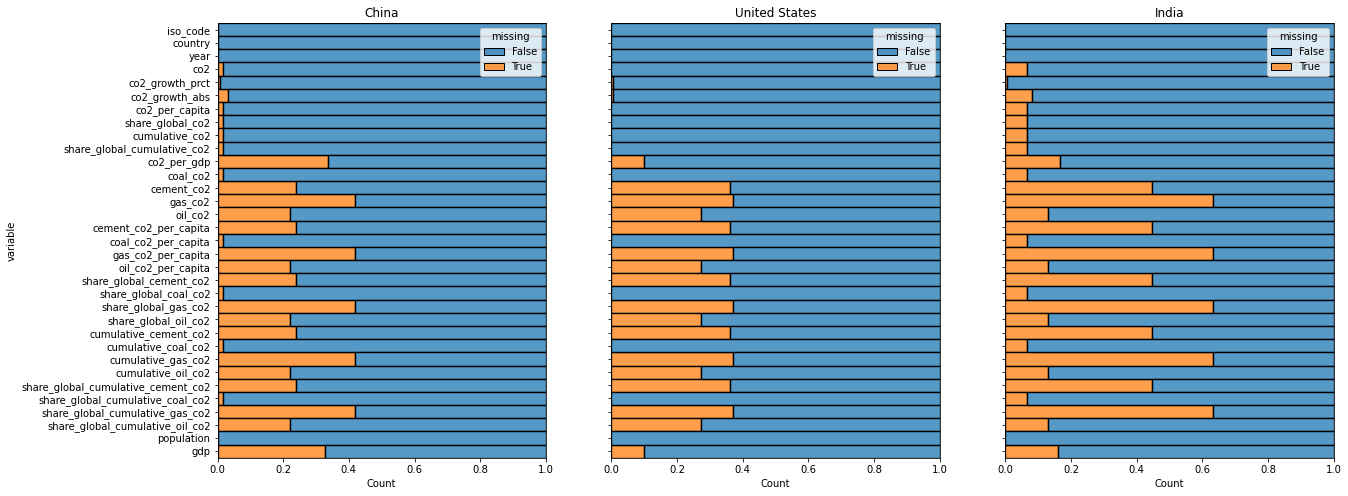

In [40]:
# check % of missing values
# not sorting because the order of columns might vary
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

missing_value = df_china2.isna().melt(value_name="missing")
sns.histplot(data=missing_value, y="variable", hue="missing", multiple="fill", ax=axes[0])
axes[0].set_title("China")

missing_value = df_us2.isna().melt(value_name="missing")
sns.histplot(data=missing_value, y="variable", hue="missing", multiple="fill", ax=axes[1])
axes[1].set_title("United States")

missing_value = df_india2.isna().melt(value_name="missing")
sns.histplot(data=missing_value, y="variable", hue="missing", multiple="fill", ax=axes[2])
axes[2].set_title("India")

plt.show()

### Multivariate Imputation

Next, we will be using multivariate imputation to fill up missing values


In [41]:
print(df_china2.shape)
print(df_us2.shape)
print(df_india2.shape)

(122, 33)
(221, 33)
(163, 33)


In [42]:
print(122*0.8)
print(221*0.8)
print(163*0.8)

97.60000000000001
176.8
130.4


In [43]:
# function to perform multivariate imputation
def multivariate_imputation(df):
    
    N = 20
    df_train = df.iloc[:-N] 
    df_test = df[-N:] # last N years

    print(f'Training years: {df_train.shape[0]}')
    print(f'Test years: {df_test.shape[0]}')

    imp = IterativeImputer(max_iter=10, random_state=2022)
    imp.fit(df_train.iloc[:,3:]) 

    df_predict_array = imp.transform(df_test.iloc[:,3:])

    columns = df.columns.tolist()[3:]
    df_predict = pd.DataFrame(df_predict_array, columns=columns) # array to df

    df_predict['iso_code'] = df['iso_code']
    df_predict['country'] = df['country']
    df_predict['year'] = df_test['year'].to_list() # predicted years

    df_predict = df_predict.reindex(columns=df_test.columns.tolist())
    return df_predict
    

In [44]:
df_china_impute = multivariate_imputation(df_china2)
display(df_china_impute)

df_us_impute = multivariate_imputation(df_us2)
display(df_us_impute)

df_india_impute = multivariate_imputation(df_india2)
display(df_india_impute)

Training years: 102
Test years: 20


iso_code country  year        co2  co2_growth_prct  co2_growth_abs  \
0       CHN   China  2001   3514.934             2.20          75.782   
1       CHN   China  2002   3872.595            10.18         357.662   
2       CHN   China  2003   4545.014            17.36         672.419   
3       CHN   China  2004   5223.755            14.93         678.741   
4       CHN   China  2005   5876.555            12.50         652.801   
5       CHN   China  2006   6488.804            10.42         612.248   
6       CHN   China  2007   6978.612             7.55         489.808   
7       CHN   China  2008   7496.832             7.43         518.220   
8       CHN   China  2009   7886.533             5.20         389.701   
9       CHN   China  2010   8616.653             9.26         730.120   
10      CHN   China  2011   9528.556            10.58         911.903   
11      CHN   China  2012   9775.622             2.59         247.066   
12      CHN   China  2013   9952.744             1.81         177.122   
13      CHN   China  2014   9985.583             0.33          32.840   
14      CHN   China  2015   9848.420            -1.37        -137.164   
15      CHN   China  2016   9720.444            -1.30        -127.976   
16      CHN   China  2017   9920.459             2.06         200.015   
17      CHN   China  2018  10289.990             3.72         369.530   
18      CHN   China  2019  10489.989             1.94         199.999   
19      CHN   China  2020  10667.887             1.70         177.899   

    co2_per_capita  share_global_co2  cumulative_co2  \
0            2.706             13.81       78398.967   
1            2.962             14.87       82271.562   
2            3.456             16.61       86816.576   
3            3.948             18.25       92040.331   
4            4.416             19.85       97916.886   
5            4.848             21.22      104405.690   
6            5.185             22.16      111384.302   
7            5.539             23.38      118881.134   
8            5.794             24.95      126767.667   
9            6.295             25.84      135384.319   
10           6.922             27.64      144912.875   
11           7.062             27.95      154688.497   
12           7.151             28.21      164641.241   
13           7.135             28.10      174626.824   
14           7.000             27.74      184475.244   
15           6.874             27.42      194195.688   
16           6.981             27.61      204116.147   
17           7.208             28.08      214406.137   
18           7.316             28.58      224896.125   
19           7.412             30.65      235564.013   

    share_global_cumulative_co2  ...  cumulative_cement_co2  \
0                          7.32  ...               2991.916   
1                          7.50  ...               3288.506   
2                          7.72  ...               3633.692   
3                          7.99  ...               4013.684   
4                          8.28  ...               4425.333   
5                          8.61  ...               4895.420   
6                          8.95  ...               5410.400   
7                          9.31  ...               5936.325   
8                          9.69  ...               6519.885   
9                         10.09  ...               7159.477   
10                        10.53  ...               7868.041   
11                        10.97  ...               8582.823   
12                        11.39  ...               9331.146   
13                        11.79  ...              10109.773   
14                        12.16  ...              10831.768   
15                        12.51  ...              11574.812   
16                        12.85  ...              12332.997   
17                        13.19  ...              13119.742   
18                        13.53  ...              13946.618   
19                        13.89 

Training years: 201
Test years: 20


iso_code        country  year       co2  co2_growth_prct  co2_growth_abs  \
0       USA  United States  2001  5904.882            -1.76        -105.627   
1       USA  United States  2002  5946.771             0.71          41.889   
2       USA  United States  2003  6011.837             1.09          65.067   
3       USA  United States  2004  6114.007             1.70         102.169   
4       USA  United States  2005  6134.521             0.34          20.515   
5       USA  United States  2006  6051.668            -1.35         -82.853   
6       USA  United States  2007  6131.004             1.31          79.336   
7       USA  United States  2008  5914.078            -3.54        -216.926   
8       USA  United States  2009  5478.210            -7.37        -435.868   
9       USA  United States  2010  5675.786             3.61         197.577   
10      USA  United States  2011  5540.173            -2.39        -135.613   
11      USA  United States  2012  5338.698            -3.64        -201.475   
12      USA  United States  2013  5474.257             2.54         135.558   
13      USA  United States  2014  5522.807             0.89          48.550   
14      USA  United States  2015  5371.771            -2.73        -151.037   
15      USA  United States  2016  5248.024            -2.30        -123.747   
16      USA  United States  2017  5207.751            -0.77         -40.273   
17      USA  United States  2018  5375.491             3.22         167.739   
18      USA  United States  2019  5255.816            -2.23        -119.674   
19      USA  United States  2020  4712.771           -10.33        -543.046   

    co2_per_capita  share_global_co2  cumulative_co2  \
0           20.747             23.20      310217.648   
1           20.700             22.84      316164.418   
2           20.744             21.97      322176.256   
3           20.913             21.36      328290.263   
4           20.795             20.72      334424.784   
5           20.324             19.79      340476.452   
6           20.395             19.47      346607.456   
7           19.487             18.44      352521.534   
8           17.885             17.33      357999.744   
9           18.368             17.02      363675.530   
10          17.781             16.07      369215.704   
11          17.000             15.26      374554.402   
12          17.302             15.52      380028.659   
13          17.331             15.54      385551.466   
14          16.741             15.13      390923.236   
15          16.247             14.80      396171.260   
16          16.020             14.50      401379.012   
17          16.434             14.67      406754.502   
18          15.972             14.32      412010.318   
19          14.238             13.54      416723.089   

    share_global_cumulative_co2  ...  cumulative_cement_co2  \
0                         28.98  ...               1988.136   
1                         28.83  ...               2031.300   
2                         28.67  ...               2074.649   
3                         28.48  ...               2120.535   
4                         28.29  ...               2166.729   
5                         28.08  ...               2213.579   
6                         27.86  ...               2259.088   
7                         27.62  ...               2300.504   
8                         27.37  ...               2330.119   
9                         27.12  ...               2361.568   
10                        26.84  ...               2393.776   
11                        26.55  ...               2429.047   
12                        26.28  ...               2465.416   
13                        26.02  ...               2504.855   
14                        25.77  ...               2544.762   
15                        25.52  ...               2584.201   
16                        25.27  ...               2624.525   
17                        25.03 

Training years: 143
Test years: 20


iso_code country  year       co2  co2_growth_prct  co2_growth_abs  \
0       IND   India  2001   992.560             1.39          13.641   
1       IND   India  2002  1023.027             3.07          30.467   
2       IND   India  2003  1059.616             3.58          36.589   
3       IND   India  2004  1125.471             6.21          65.855   
4       IND   India  2005  1185.953             5.37          60.482   
5       IND   India  2006  1259.744             6.22          73.791   
6       IND   India  2007  1358.152             7.81          98.408   
7       IND   India  2008  1462.815             7.71         104.662   
8       IND   India  2009  1612.817            10.25         150.002   
9       IND   India  2010  1677.888             4.03          65.071   
10      IND   India  2011  1780.130             6.09         102.242   
11      IND   India  2012  1963.586            10.31         183.456   
12      IND   India  2013  2036.937             3.74          73.351   
13      IND   India  2014  2185.856             7.31         148.919   
14      IND   India  2015  2268.567             3.78          82.712   
15      IND   India  2016  2382.223             5.01         113.656   
16      IND   India  2017  2433.856             2.17          51.633   
17      IND   India  2018  2599.806             6.82         165.950   
18      IND   India  2019  2625.968             1.01          26.162   
19      IND   India  2020  2441.792            -7.01        -184.176   

    co2_per_capita  share_global_co2  cumulative_co2  \
0            0.923              3.90       19932.284   
1            0.936              3.93       20955.311   
2            0.953              3.87       22014.927   
3            0.996              3.93       23140.399   
4            1.033              4.01       24326.352   
5            1.081              4.12       25586.096   
6            1.148              4.31       26944.249   
7            1.218              4.56       28407.063   
8            1.324              5.10       30019.880   
9            1.359              5.03       31697.767   
10           1.424              5.16       33477.897   
11           1.551              5.61       35441.483   
12           1.590              5.77       37478.420   
13           1.687              6.15       39664.276   
14           1.732              6.39       41932.844   
15           1.799              6.72       44315.067   
16           1.818              6.77       46748.923   
17           1.922              7.09       49348.729   
18           1.922              7.15       51974.697   
19           1.769              7.02       54416.489   

    share_global_cumulative_co2  ...  cumulative_cement_co2  \
0                          1.86  ...                703.752   
1                          1.91  ...                752.863   
2                          1.96  ...                803.743   
3                          2.01  ...                859.288   
4                          2.06  ...                918.974   
5                          2.11  ...                983.880   
6                          2.17  ...               1052.213   
7                          2.23  ...               1125.458   
8                          2.30  ...               1206.726   
9                          2.36  ...               1292.755   
10                         2.43  ...               1384.070   
11                         2.51  ...               1484.307   
12                         2.59  ...               1592.127   
13                         2.68  ...               1707.951   
14                         2.76  ...               1825.459   
15                         2.85  ...               1948.741   
16                         2.94  ...               2069.788   
17                         3.04  ...               2208.753   
18                         3.13  ...               2352.417   
19                         3.21  ...               24

Saving above dataframes into csv files

In [46]:
df_china_impute.to_csv('output/owid_china_impute.csv', index=False)
df_us_impute.to_csv('output/owid_us_impute.csv', index=False)
df_india_impute.to_csv('output/owid_india_impute.csv', index=False)
print('Completed!')

Completed!


### Simple "EDA"

Not sure if this is still a valid EDA since the data are imputed :/

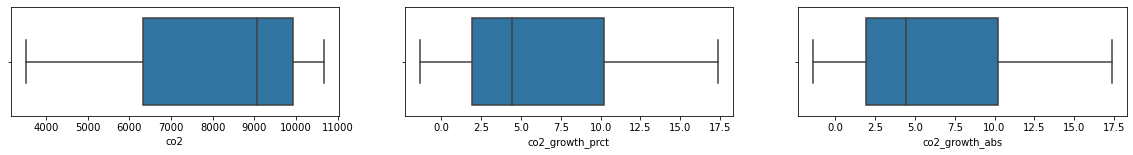

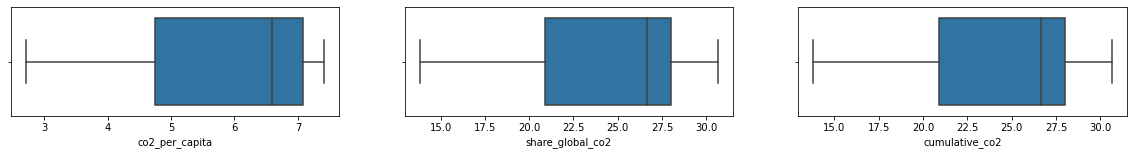

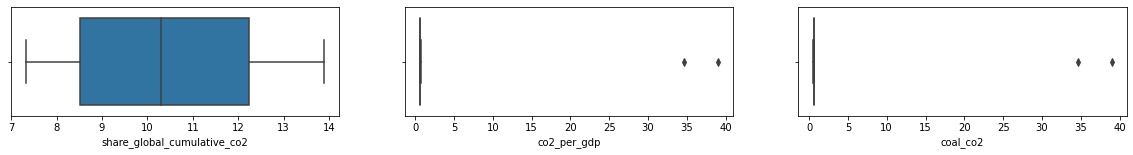

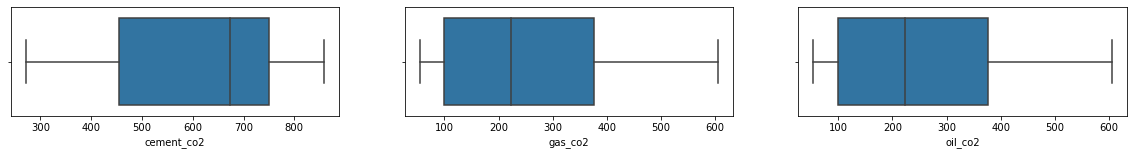

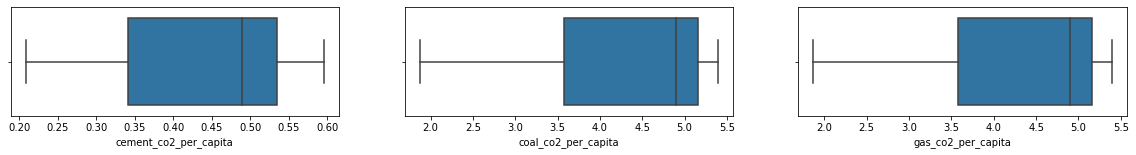

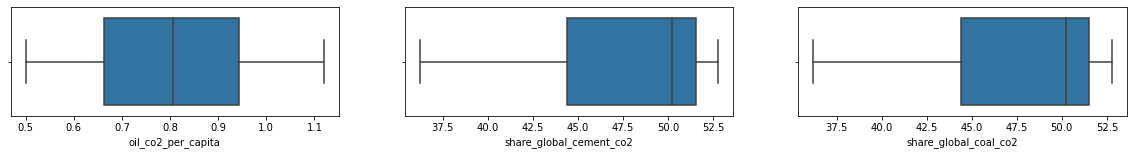

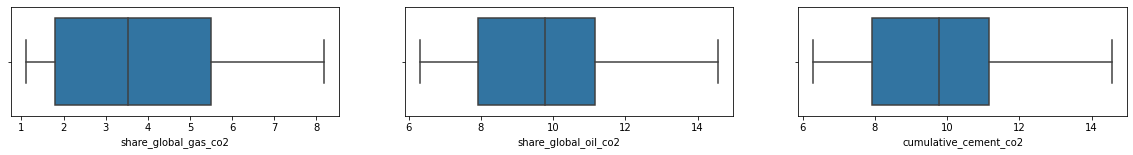

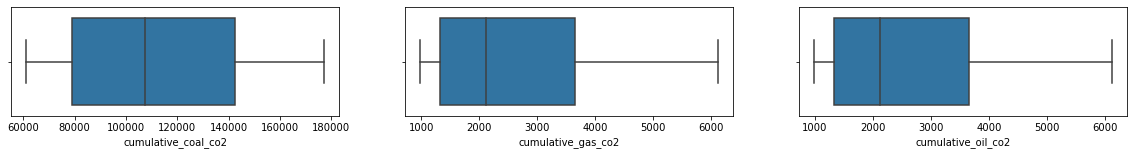

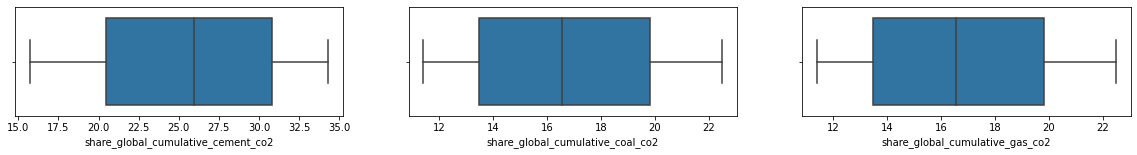

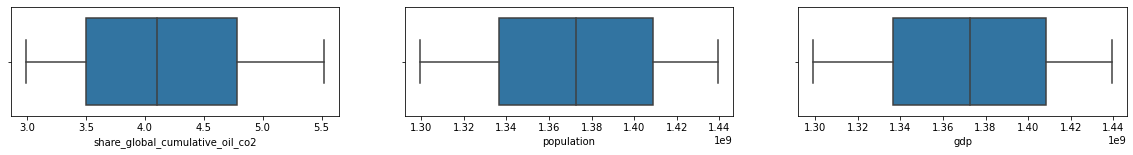

In [47]:
check_outlier(df_china_impute)

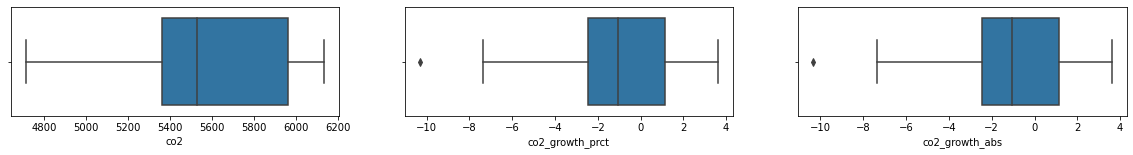

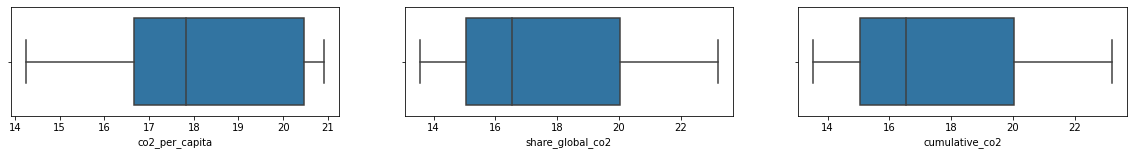

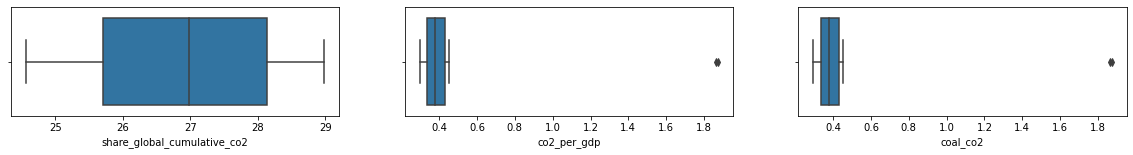

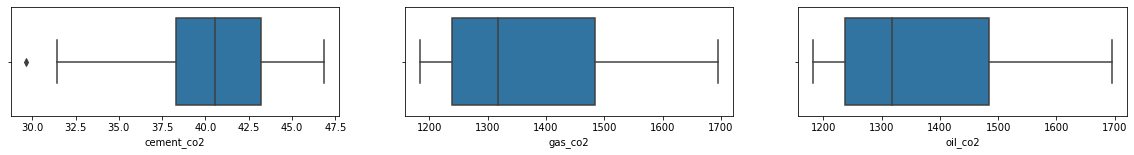

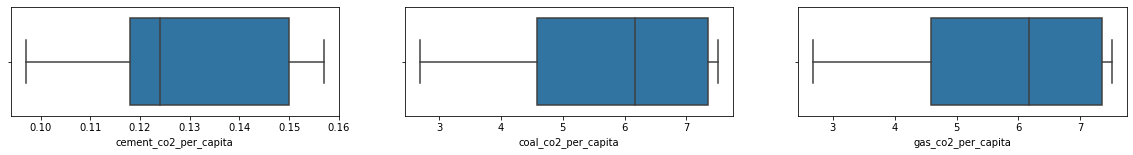

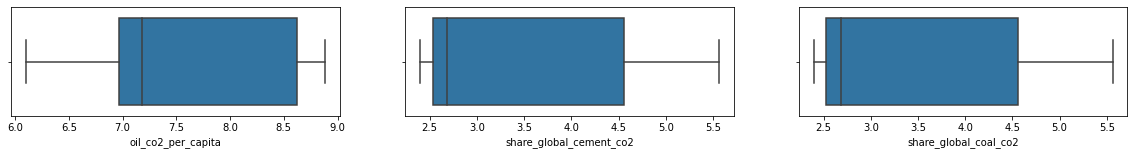

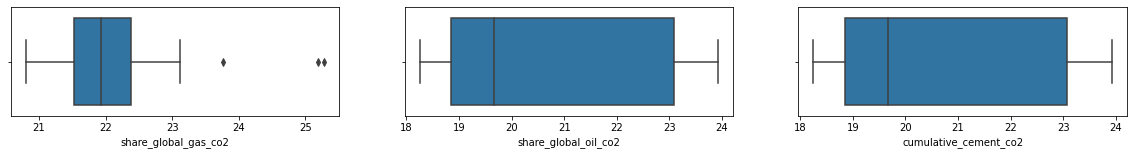

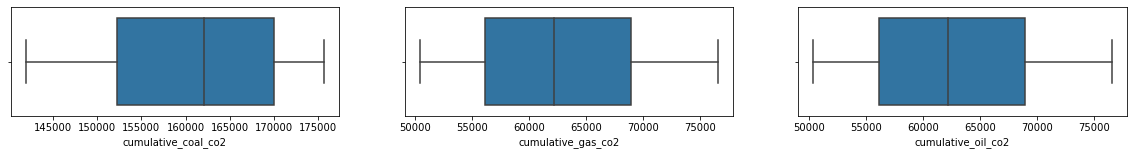

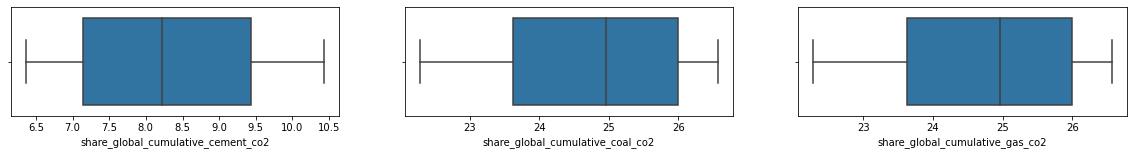

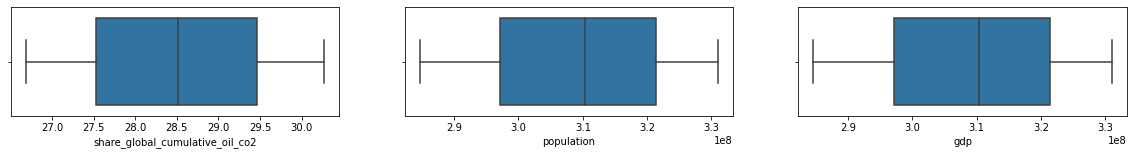

In [48]:
check_outlier(df_us_impute)

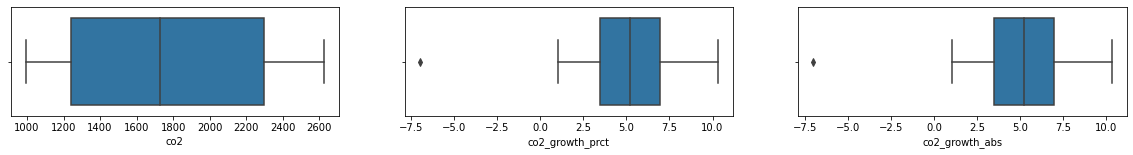

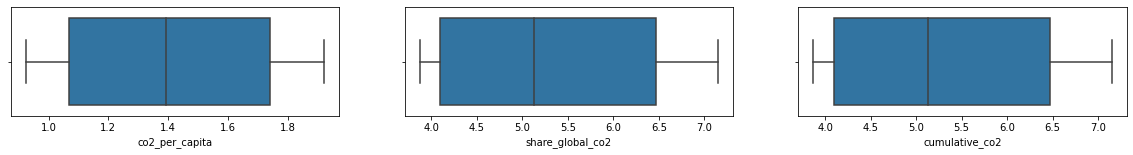

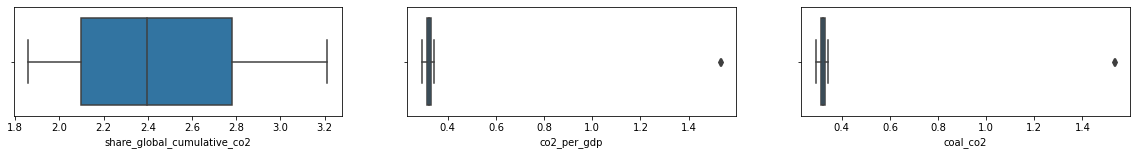

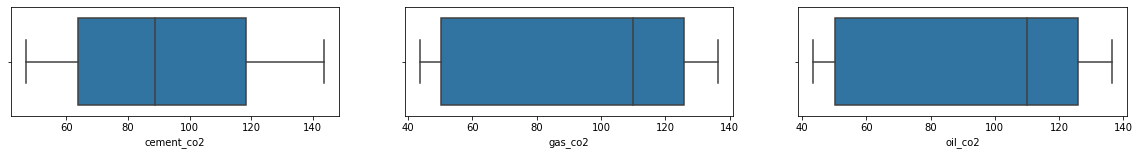

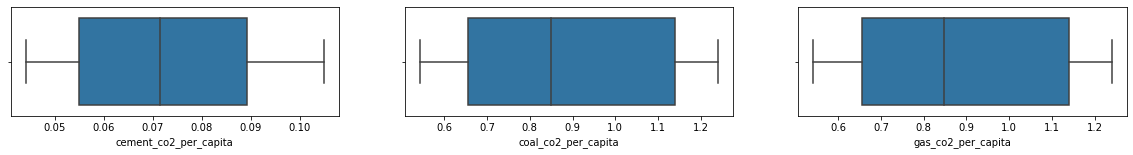

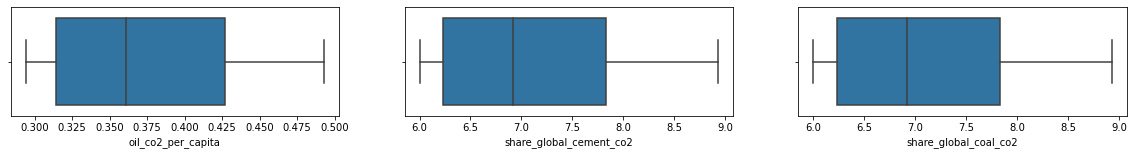

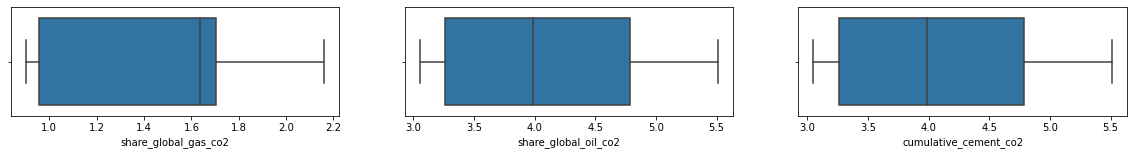

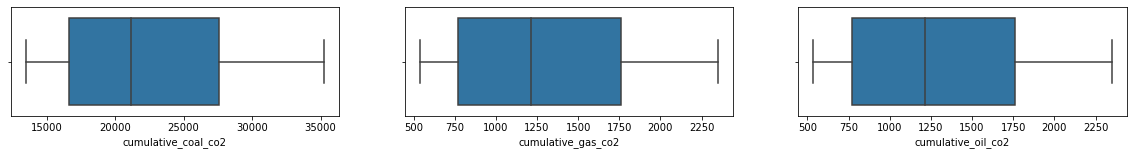

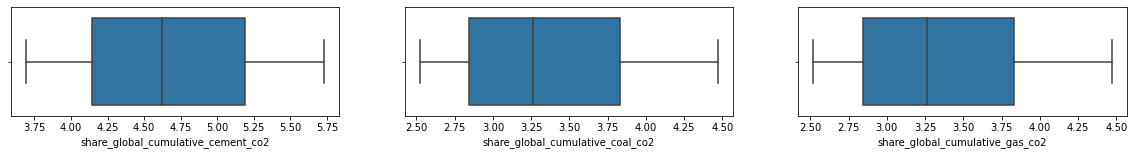

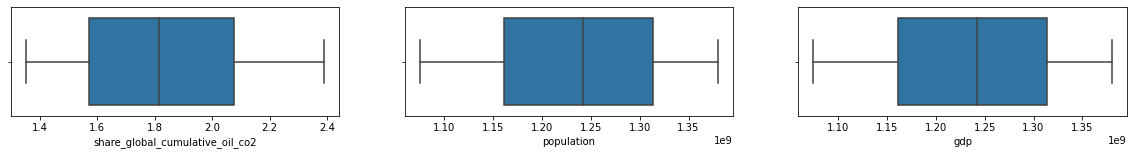

In [49]:
check_outlier(df_india_impute)

In [50]:
# function to plot combined lineplots for given dataframes
def combined_lineplot(dfs, target_col):
    
    INDICATOR = 'country' # can be 'iso_code' or 'country'
    if len(dfs) == 0:
        return 0
    
    cols = ['year', f'{INDICATOR}', f'{target_col}']
    df_world = pd.DataFrame(columns=cols)
    for df in dfs:
        df_world = df_world.append(df[cols], ignore_index=True)
    
    plt.figure(figsize=(15, 4))
    sns.lineplot(data=df_world, x='year', y=f'{target_col}', hue=f'{INDICATOR}')
    plt.title(f'{target_col}')

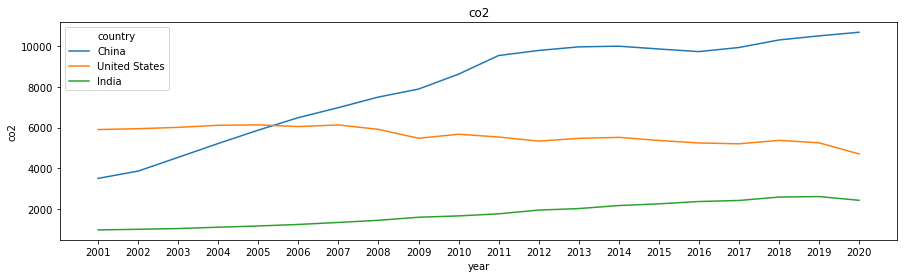

Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


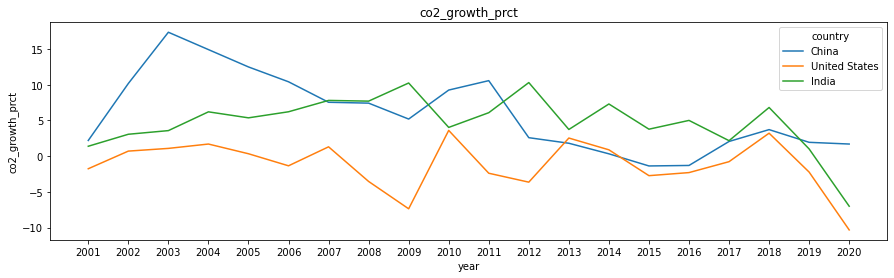

Annual percentage growth in production-based emissions of carbon dioxide (CO2). This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


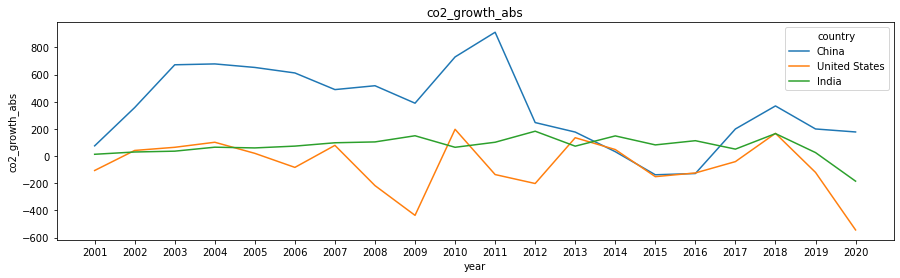

Annual growth in production-based emissions of carbon dioxide (CO2), measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


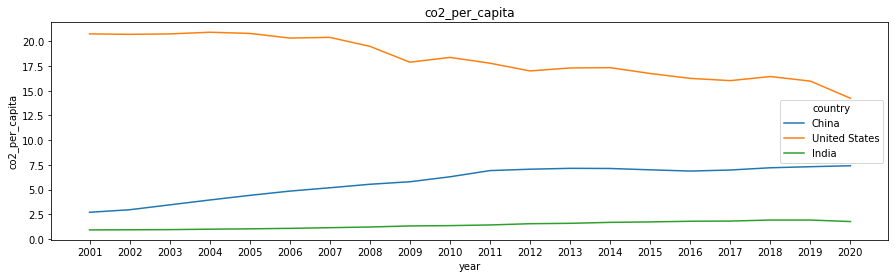

Annual production-based emissions of carbon dioxide (CO2), measured in tonnes per person. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


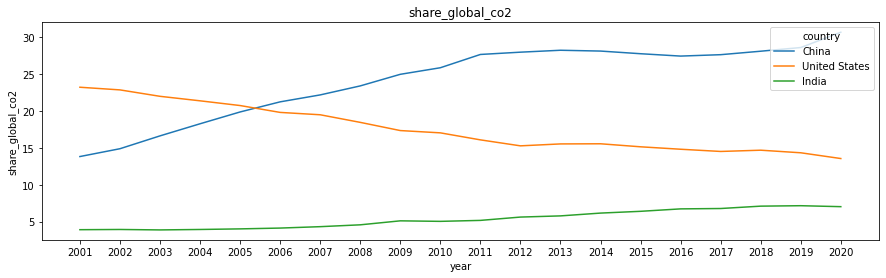

Annual production-based emissions of carbon dioxide (CO2), measured as a percentage of global production-based emissions of CO2 in the same year. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions has been calculated by Our World in Data using global CO2 emissions provided in the Global Carbon Budget dataset. Global emissions include all country emissions as well as emissions from international aviation and shipping. 

*******************************************************************************************************************************


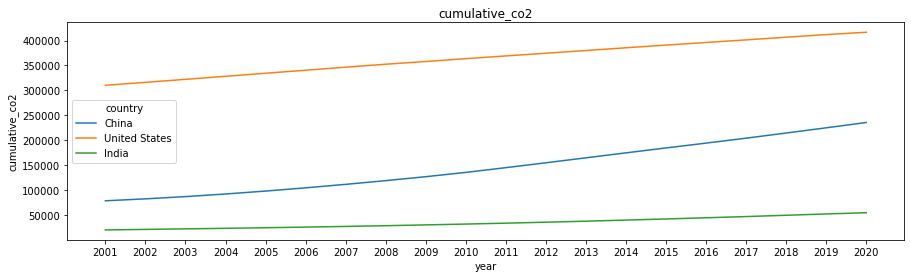

Cumulative production-based emissions of carbon dioxide (CO2) since the first year of data availability, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


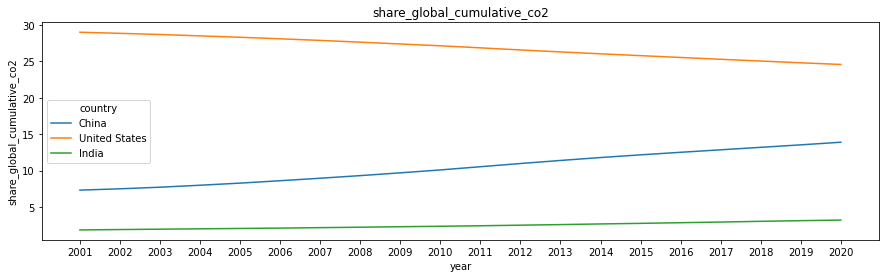

Cumulative production-based emissions of carbon dioxide (CO2) since the first year of data availability, measured as a percentage of global cumulative production-based emissions of CO2 since the first year of data availability. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions has been calculated by Our World in Data using global CO2 emissions provided in the Global Carbon Budget dataset. Global emissions include all country emissions as well as emissions from international aviation and shipping. 

*******************************************************************************************************************************


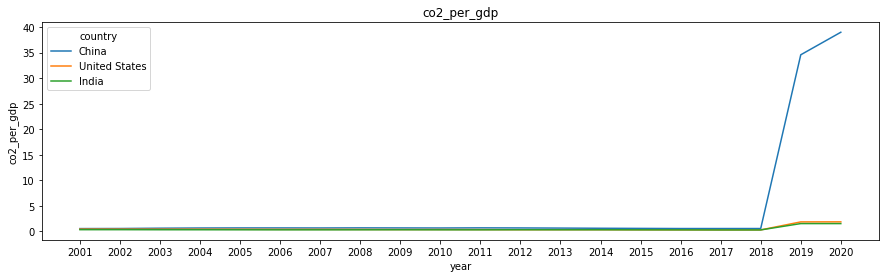

Annual production-based emissions of carbon dioxide (CO2), measured in kilograms per dollar of GDP (2011 international-$). Production-based emissions are based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


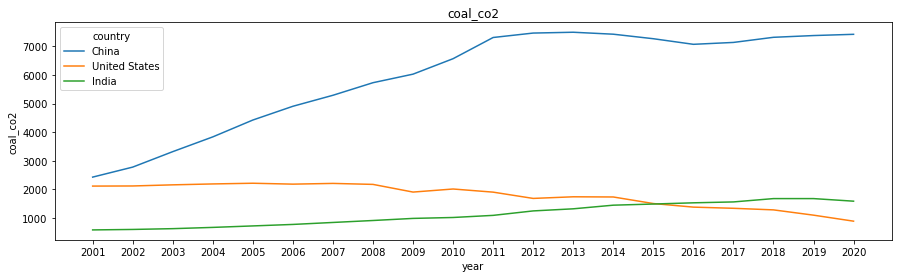

Annual production-based emissions of carbon dioxide (CO2) from coal, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


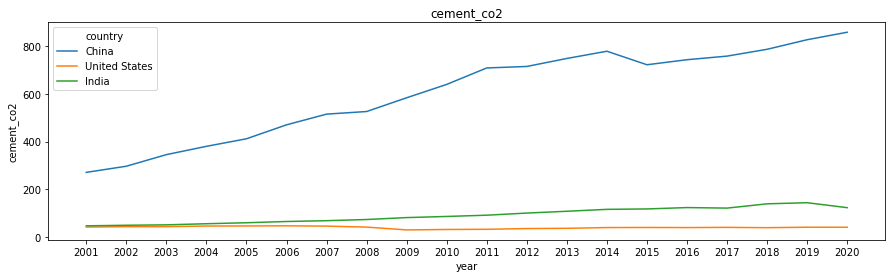

Annual production-based emissions of carbon dioxide (CO2) from cement, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


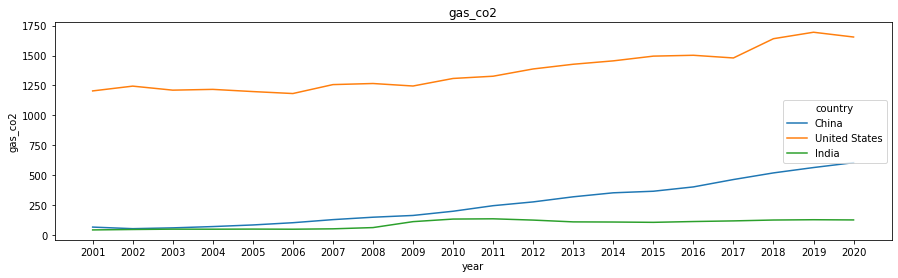

Annual production-based emissions of carbon dioxide (CO2) from gas, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


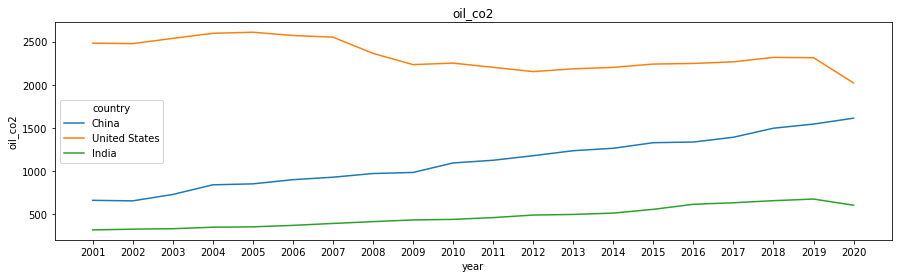

Annual production-based emissions of carbon dioxide (CO2) from oil, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


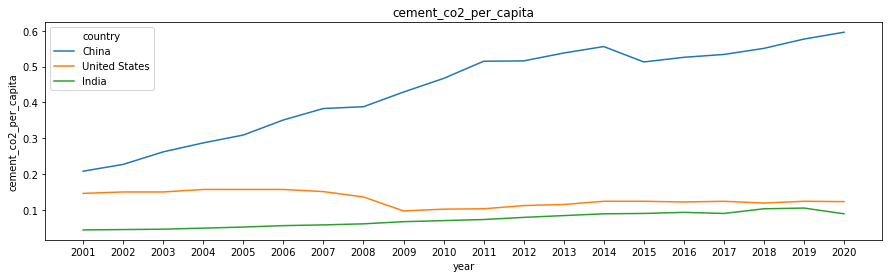

Annual production-based emissions of carbon dioxide (CO2) from cement, measured in tonnes per person. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


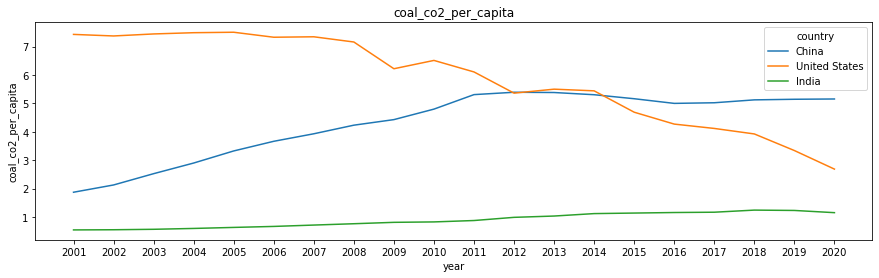

Annual production-based emissions of carbon dioxide (CO2) from coal, measured in tonnes per person. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


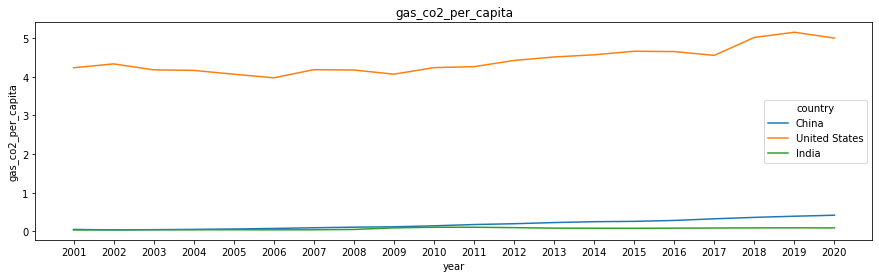

Annual production-based emissions of carbon dioxide (CO2) from gas, measured in tonnes per person. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


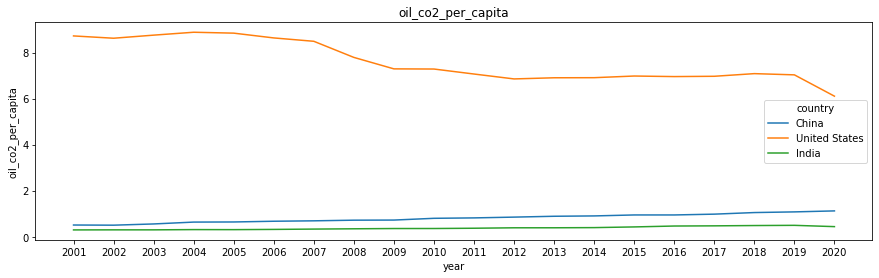

Annual production-based emissions of carbon dioxide (CO2) from oil, measured in tonnes per person. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


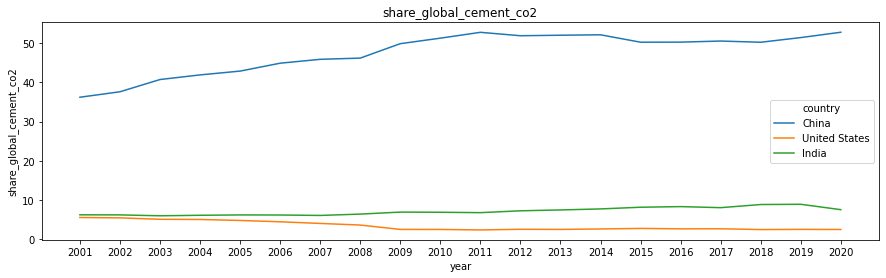

Annual production-based emissions of carbon dioxide (CO2) from cement, measured as a percentage of global production-based emissions of CO2 from cement in the same year. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from cement has been calculated by Our World in Data using global CO2 emissions from cement provided in the Global Carbon Budget dataset. Global cement emissions include all country emissions. 

*******************************************************************************************************************************


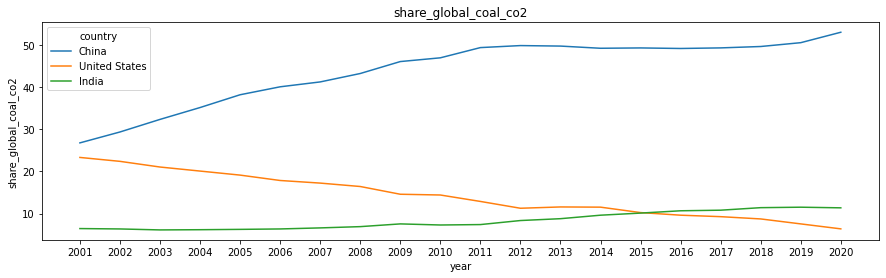

Annual production-based emissions of carbon dioxide (CO2) from coal, measured as a percentage of global production-based emissions of CO2 from coal in the same year. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from coal has been calculated by Our World in Data using global CO2 emissions from coal provided in the Global Carbon Budget dataset. Global coal emissions include all country emissions. 

*******************************************************************************************************************************


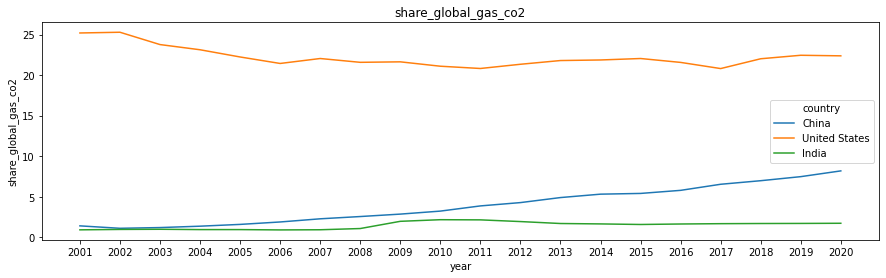

Annual production-based emissions of carbon dioxide (CO2) from gas, measured as a percentage of global production-based emissions of CO2 from gas in the same year. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from gas has been calculated by Our World in Data using global CO2 emissions from gas provided in the Global Carbon Budget dataset. Global gas emissions include all country emissions as well as emissions from international aviation and shipping. 

*******************************************************************************************************************************


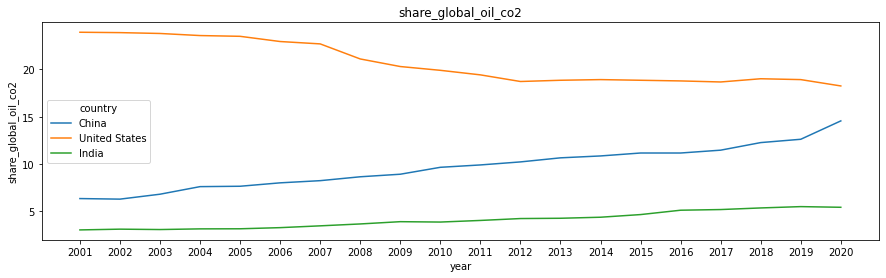

Annual production-based emissions of carbon dioxide (CO2) from oil, measured as a percentage of global production-based emissions of CO2 from oil in the same year. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from oil has been calculated by Our World in Data using global CO2 emissions from oil provided in the Global Carbon Budget dataset. Global oil emissions include all country emissions as well as emissions from international aviation and shipping. 

*******************************************************************************************************************************


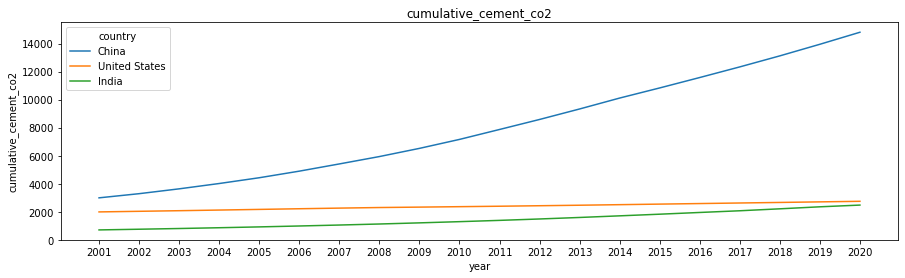

Cumulative production-based emissions of carbon dioxide (CO2) from cement since the first year of data availability, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


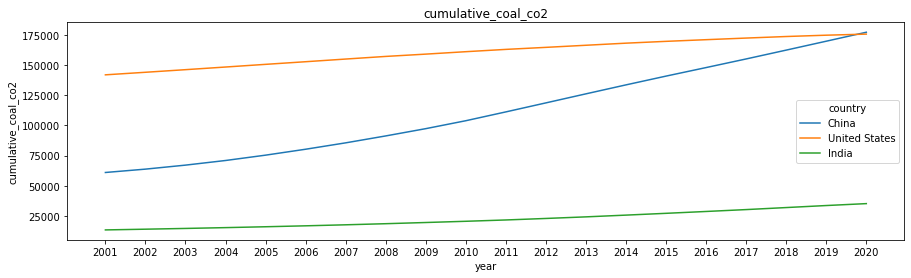

Cumulative production-based emissions of carbon dioxide (CO2) from coal since the first year of data availability, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


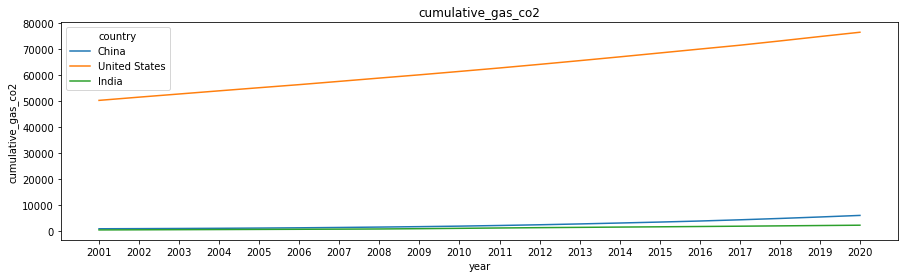

Cumulative production-based emissions of carbon dioxide (CO2) from gas since the first year of data availability, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


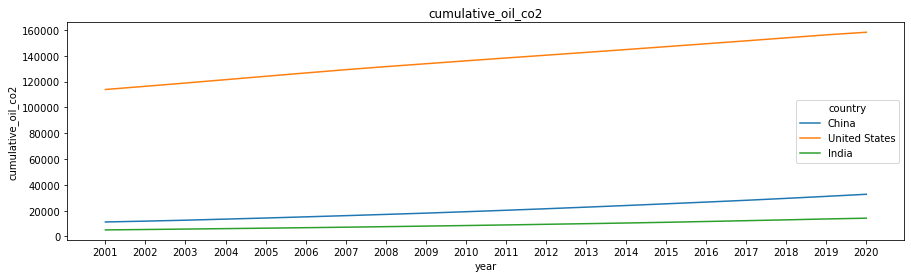

Cumulative production-based emissions of carbon dioxide (CO2) from oil since the first year of data availability, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods. 

*******************************************************************************************************************************


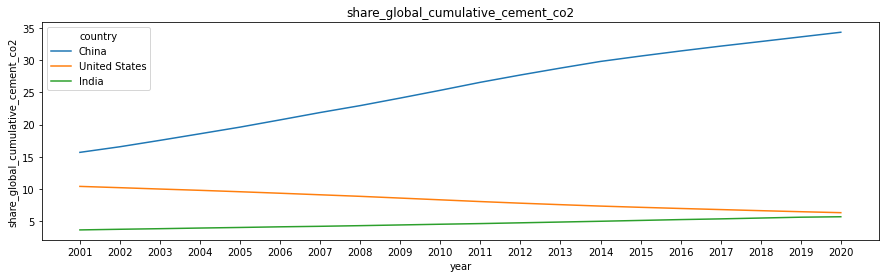

Cumulative production-based emissions of carbon dioxide (CO2) from cement since the first year of data availability, measured as a percentage of global cumulative production-based emissions of CO2 from cement since the first year of data availability. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from cement has been calculated by Our World in Data using global CO2 emissions from cement provided in the Global Carbon Budget dataset. Global cement emissions include all country emissions. 

*******************************************************************************************************************************


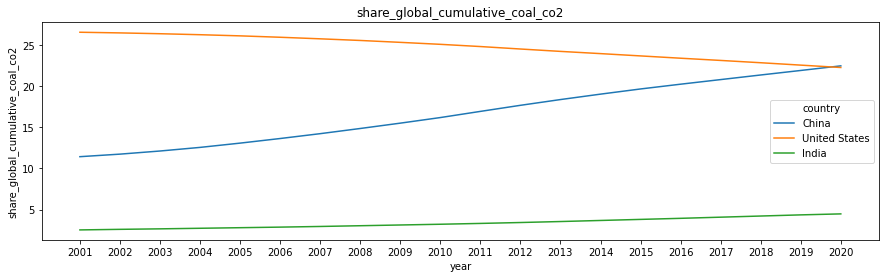

Cumulative production-based emissions of carbon dioxide (CO2) from coal since the first year of data availability, measured as a percentage of global cumulative production-based emissions of CO2 from coal since the first year of data availability. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from coal has been calculated by Our World in Data using global CO2 emissions from coal provided in the Global Carbon Budget dataset. Global coal emissions include all country emissions. 

*******************************************************************************************************************************


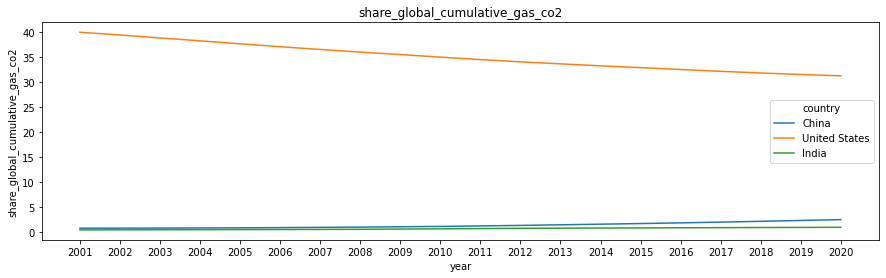

Cumulative production-based emissions of carbon dioxide (CO2) from gas since the first year of data availability, measured as a percentage of global cumulative production-based emissions of CO2 from gas since the first year of data availability. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from gas has been calculated by Our World in Data using global CO2 emissions from gas provided in the Global Carbon Budget dataset. Global gas emissions include all country emissions. 

*******************************************************************************************************************************


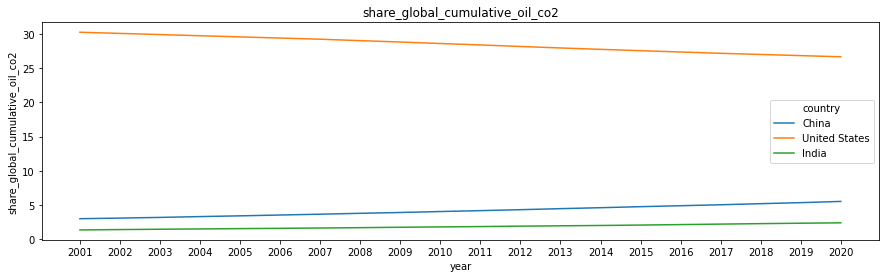

Cumulative production-based emissions of carbon dioxide (CO2) from oil since the first year of data availability, measured as a percentage of global cumulative production-based emissions of CO2 from oil since the first year of data availability. This is based on territorial emissions, which do not account for emissions embedded in traded goods. Each country's share of global CO2 emissions from oil has been calculated by Our World in Data using global CO2 emissions from oil provided in the Global Carbon Budget dataset. Global oil emissions include all country emissions as well as emissions from international aviation and shipping. 

*******************************************************************************************************************************


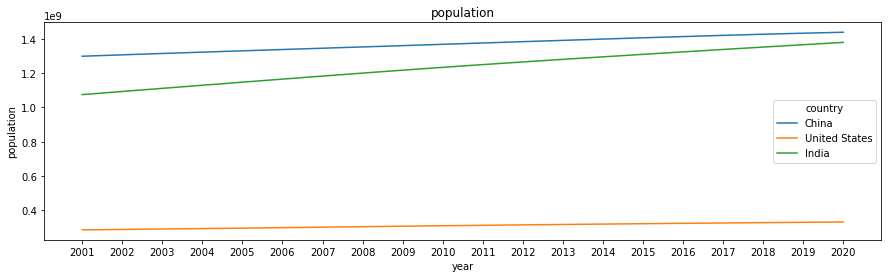

Population by country, available from 1800 to 2021 based on Gapminder data, HYDE, and UN Population Division (2019) estimates. 

*******************************************************************************************************************************


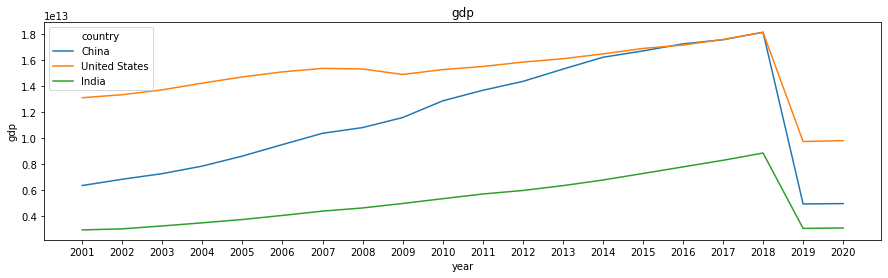

Gross domestic product measured in international-$ using 2011 prices to adjust for price changes over time (inflation) and price differences between countries. Calculated by multiplying GDP per capita with population. 

*******************************************************************************************************************************


In [51]:
dfs = [df_china_impute, df_us_impute, df_india_impute]

for col in df_china_impute.columns.tolist()[3:]:
    combined_lineplot(dfs, col)
    plt.show()
    print(get_column_desc(col), '\n')
    print('*' * 127)

## 🔭Looking at more countries

In [52]:
df

iso_code      country  year     co2  consumption_co2  co2_growth_prct  \
0          AFG  Afghanistan  1949   0.015              NaN              NaN   
1          AFG  Afghanistan  1950   0.084              NaN           475.00   
2          AFG  Afghanistan  1951   0.092              NaN             8.70   
3          AFG  Afghanistan  1952   0.092              NaN             0.00   
4          AFG  Afghanistan  1953   0.106              NaN            16.00   
...        ...          ...   ...     ...              ...              ...   
25199      ZWE     Zimbabwe  2016  10.738           12.153           -12.17   
25200      ZWE     Zimbabwe  2017   9.582           11.248           -10.77   
25201      ZWE     Zimbabwe  2018  11.854           13.163            23.72   
25202      ZWE     Zimbabwe  2019  10.949           12.422            -7.64   
25203      ZWE     Zimbabwe  2020  10.531              NaN            -3.82   

       co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
0                 NaN        NaN           0.002                         NaN   
1               0.070        NaN           0.011                         NaN   
2               0.007        NaN           0.012                         NaN   
3               0.000        NaN           0.012                         NaN   
4               0.015        NaN           0.013                         NaN   
...               ...        ...             ...                         ...   
25199          -1.488      1.415           0.765                       0.866   
25200          -1.156      1.666           0.673                       0.790   
25201           2.273      1.308           0.821                       0.912   
25202          -0.905      1.473           0.748                       0.848   
25203          -0.418        NaN           0.709                         NaN   

       ...  ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
0      ...             NaN      NaN                 NaN            NaN   
1      ...             NaN      NaN                 NaN            NaN   
2      ...             NaN      NaN                 NaN            NaN   
3      ...             NaN      NaN                 NaN            NaN   
4      ...             NaN      NaN                 NaN            NaN   
...    ...             ...      ...                 ...            ...   
25199  ...           4.703    11.92                0.85           6.55   
25200  ...             NaN      NaN                 NaN            NaN   
25201  ...             NaN      NaN                 NaN            NaN   
25202  ...             NaN      NaN                 NaN            NaN   
25203  ...             NaN      NaN                 NaN            NaN   

       nitrous_oxide_per_capita  population           gdp  \
0                           NaN   7624058.0           NaN   
1                           NaN   7752117.0  9.421400e+09   
2                           NaN   7840151.0  9.692280e+09   
3                           NaN   7935996.0  1.001732e+10   
4                           NaN   8039684.0  1.063052e+10   
...                         ...         ...           ...   
25199                     0.467  14030338.0  2.096179e+10   
25200                       NaN  14236599.0  2.194784e+10   
25201                       NaN  14438812.0  2.271535e+10   
25202                       NaN  14645473.0           NaN   
25203                       NaN  14862927.0           NaN   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
0                             NaN                NaN             NaN  
1                             NaN                NaN             NaN  
2                             NaN                NaN             NaN  
3                             NaN                NaN             NaN  
4                             NaN                NaN             NaN  
...                           ...               

In [53]:
all_countries = df.iso_code.unique().tolist()
print(len(all_countries))
print(all_countries)

220
['AFG', nan, 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD', 'GLP', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT', 'MUS', 'MYT', 'MEX', 'MDA', 'MNG', 'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NCL', 'NZL'

In [54]:
# function to get country name using iso code
def get_country_name(iso_code):
    col =  df[df['iso_code']==iso_code]
    if len(col) == 0:
        return 'the specified iso_code does not exists'
    return str(col.iloc[0]['country'])

# function to get iso_code using country name
def get_iso_code(country):
    col =  df[df['country']==country]
    if len(col) == 0:
        return 'the specified country does not exists'
    return str(col.iloc[0]['iso_code'])

get_country_name('OWID_WRL')

'World'

In [55]:
get_country_name('OWID_KOS')

'Kosovo'

In [56]:
get_country_name('TTO')

'Trinidad and Tobago'